# Визуализация данных с помощью matplotlib

Импорт библиотеки

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt # or  import matplotlib.pyplot as plt

На этом этапе у нас не будут отображаться графики. Встроить отображение графиков можем двумя способами  
`%matplotlib notebook` приведет к интерактивным графикам, встроенным в ноутбук  
`%matplotlib inline` приведет к статическим отображениям графиков, встроенных в ноутбук (обычно я импортирую таким способом: так при сохранении ноутбуков и переоткрытии графики выглядят более компактно)

In [120]:
%matplotlib inline

# Построение базовых графиков

## Линейный график

Линейный график `plot` позволяет визуализировать зависмости y от x, то есть функции вида $y = f(x)$ :

In [139]:
x = np.linspace(0, 10, 100)

In [121]:
# x

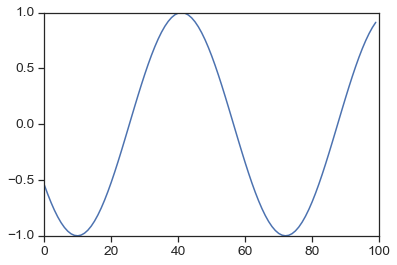

In [122]:
plt.plot(np.sin(x))

Добавдяем в конце `;` чтоб не печаталось лишнего.

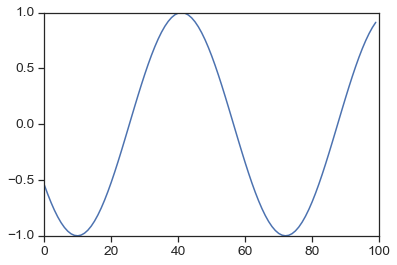

In [123]:
plt.plot(np.sin(x));

Можем задать значения оси x:

In [117]:
plt.plot(x, np.sin(x));

Можем построить несколько линий на одной фигуре.

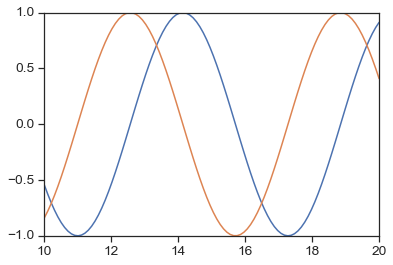

In [129]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

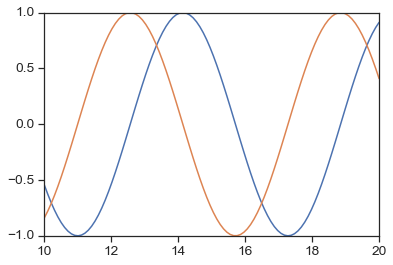

In [125]:
plt.plot(x, np.sin(x), x, np.cos(x));

Цвета для разных линий чередуются по умолчанию. Но мы можем из задать, при чём разными способами:

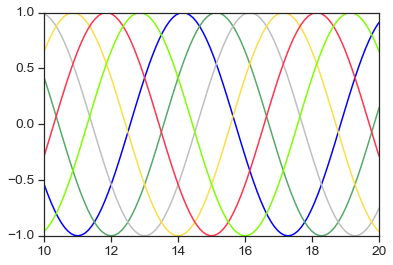

In [130]:
plt.plot(x, np.sin(x - 0), color='blue')        # по имени
plt.plot(x, np.sin(x - 1), color='g')           # по короткому названию (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # оттенки серого от 0 до 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex код (RRGGBB от 00 до FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB кортеж, значения от 0 до 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # поддерживаются также ссе CSS названия цветов

Какие есть цвета по названиям можно найти [здесь](https://matplotlib.org/stable/gallery/color/named_colors.html).

Мы также можем задавать стиль линии, по названию или символами:

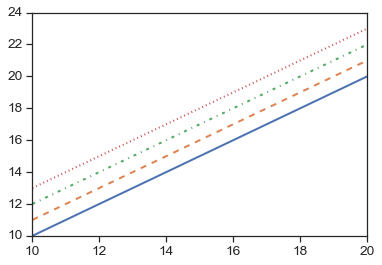

In [132]:
plt.plot(x, x + 0, linestyle='solid', linewidth=2)
plt.plot(x, x + 1, linestyle='dashed', linewidth=2)
plt.plot(x, x + 2, linestyle='dashdot', linewidth=2)
plt.plot(x, x + 3, linestyle='dotted', linewidth=2);

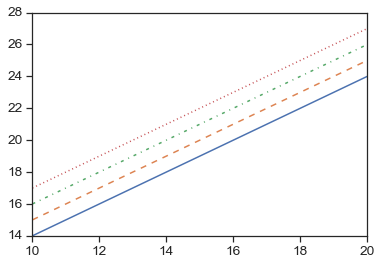

In [136]:
# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdota
plt.plot(x, x + 7, linestyle=':');  # dotted

Можем задать стиль линии вместе с цветом

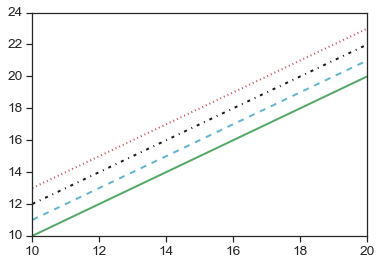

In [137]:
plt.plot(x, x + 0, '-g', linewidth=2)  # solid green
plt.plot(x, x + 1, '--c', linewidth=2) # dashed cyan
plt.plot(x, x + 2, '-.k', linewidth=2) # dashdot black
plt.plot(x, x + 3, ':r', linewidth=2);  # dotted red

## Пределы графика

In [140]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

Альтренативно можем использовать метод `plt.axis()` (обратите внимание на потенциальную путаницу между `axes` с буквой e и `axis` с i).

Метод `plt.axis()` позволяет установить пределы x и y с помощью одного вызова, передав список, который указывает [xmin, xmax, ymin, ymax]:

In [141]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

А так мы можем максимально поместить график в панель.

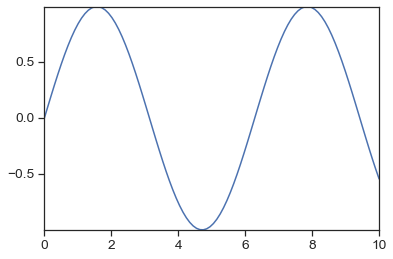

In [142]:
plt.plot(x, np.sin(x))
plt.axis('tight');

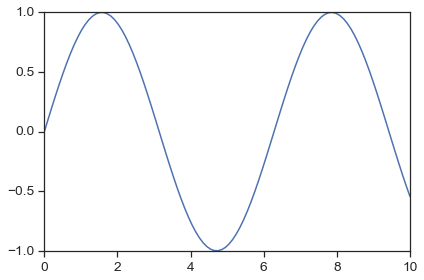

In [143]:
plt.plot(x, np.sin(x))
plt.tight_layout()

А так мы можем обеспечить, чтоб на экране одна единица по оси ОХ соответствовала одной единице на оси ОУ:

In [144]:
plt.plot(x, np.sin(x))
plt.axis('equal');

## Несколько графиков на одной фигуре.

Существует два интерфейса для этой задачи.

### В стиле MATLAB

Matplotlib изначально был написан как альтернатива Python для пользователей MATLAB, и большая часть его синтаксиса отражает этот факт.

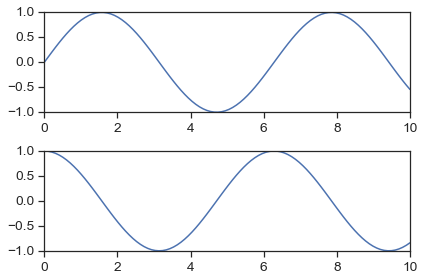

In [146]:
plt.figure()  # создаём фигуру

# создаём первую из двух панелей и устанавливаем текущую ось
plt.subplot(2, 1, 1) # (строки, колонки, номер панели)
plt.plot(x, np.sin(x))

# создаём вторую из двух панелей и устанавливаем текущую ось
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.tight_layout();

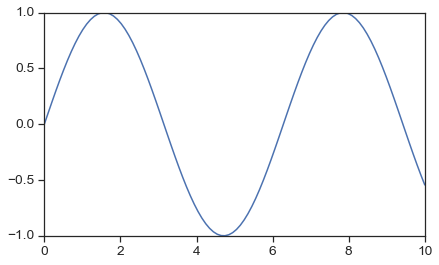

In [152]:
plt.figure(figsize=(15,5))  # создаём фигуру

# создаём первую из двух панелей и устанавливаем текущую ось
plt.subplot(1, 2, 1) # (строки, колонки, номер панели)
plt.plot(x, np.sin(x))

# создаём вторую из двух панелей и устанавливаем текущую ось
plt.subplot(1, 2, 2)
plt.plot(x, np.cos(x));

Этот интерфейс отслеживает состояние: он отслеживает «текущую» фигуру и оси, по которым применяются все команды plt.   
Вы можете получить ссылку на них, используя процедуры `plt.gcf()` (получить текущий рисунок) и `plt.gca()` (получить текущие оси).

Хотя этот интерфейс с отслеживанием состояния быстр и удобен для простых графиков, с ним легко столкнуться с проблемами.   
Например, после создания второй панели, как мы можем вернуться и добавить что-нибудь к первой?   
Это возможно в интерфейсе в стиле MATLAB, но довольно неудобно. К счастью, есть второй способ.

### Объектно-ориентированный интерфейс

Объектно-ориентированный интерфейс доступен для этих более сложных ситуаций, а также для тех случаев, когда вам нужен больший контроль над своей фигурой.   
В объектно-ориентированном интерфейсе функции построения графиков являются методами явных объектов Figure и Axes, а не зависят от какого-либо понятия «активная» фигура или оси.   
Чтобы воссоздать предыдущий график с использованием этого стиля построения, делаем следующее:

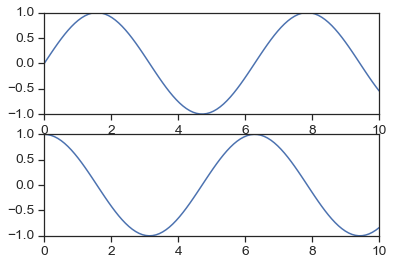

In [156]:
# Сначала создайеём сетку графиков
# ax будет массивом из двух объектов Axes
fig, ax = plt.subplots(2)

# Вызов plot() метода для нужного объекта
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

In [157]:
?plt.subplots

Но на практике во время ознакомления с данными я использую первый способ. Тогда мне нужно строить простые визуализации для себя.

Когда же надо построить визуализации "на длительное пользвоание", применяю второй способ по необходимости.

## Подписи

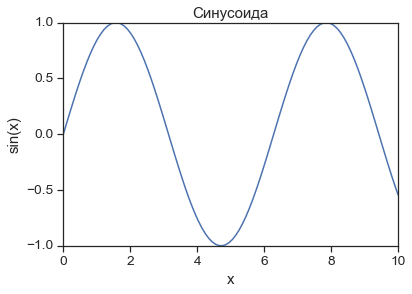

In [158]:
plt.plot(x, np.sin(x))
plt.title("Синусоида")
plt.xlabel("x")
plt.ylabel("sin(x)");

Положение, размер и стиль подписей можно настроить с помощью дополнительных аргументов функций.

Легенда

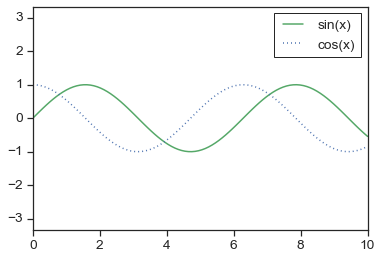

In [159]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

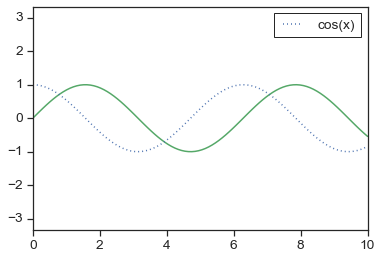

In [161]:
plt.plot(x, np.sin(x), '-g')
plt.plot(x, np.cos(x), ':b')
plt.axis('equal')

plt.legend();

Иногда нам надо использовать `ax` методы. Тогда подписи будут выглядеть так:

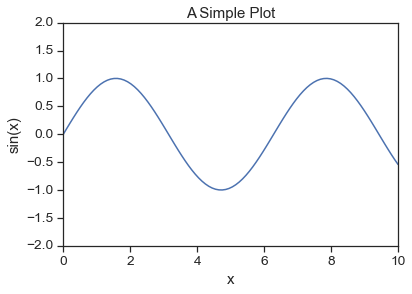

In [162]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

Для перехода между функциями в стиле MATLAB и объектно-ориентированными методами внесите следующие изменения:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

## Сохранение графика в файл

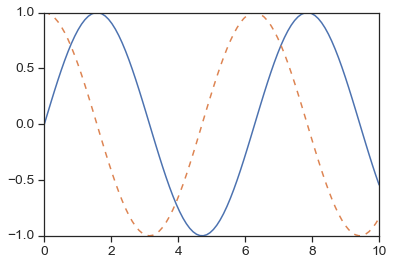

In [163]:
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [164]:
fig.savefig('figure_1.png')

In [165]:
!ls -lh figure_1.png

-rw-r--r--  1 hanna.pylieva  staff    31K Oct  1 19:36 figure_1.png


Убедимся, что сохранённая картинка содержит то, что нам надо. И заодно посмотрим, как загружать картинки в Jupyter Notebook.

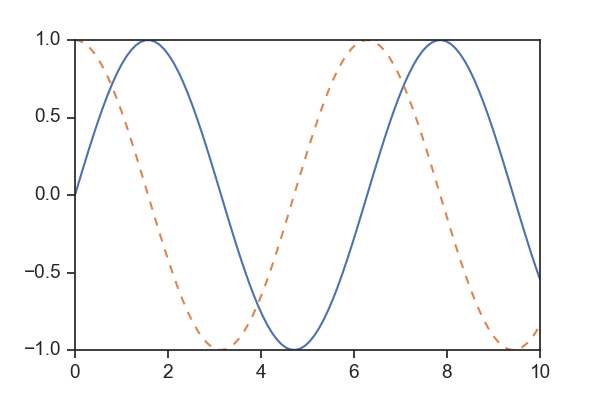

In [166]:
from IPython.display import Image
Image('figure_1.png')

Можно было обойтись и без `fig`.Заодно сохраним с большим dpi (dots per inch).

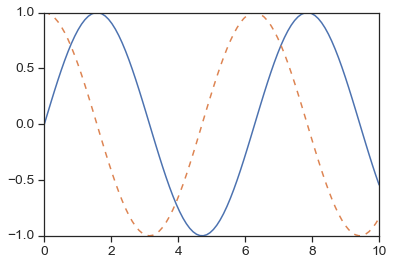

In [167]:
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
plt.savefig('figure_2.png', dpi=100)

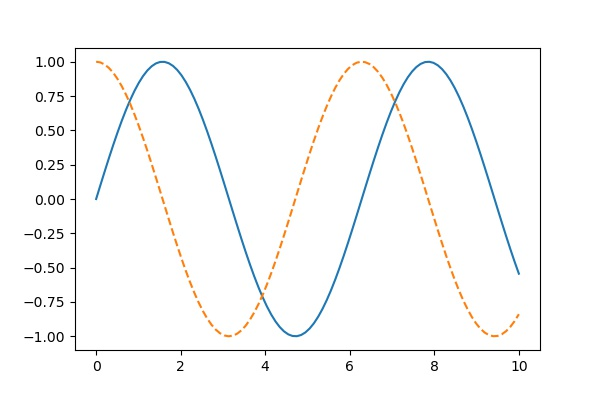

In [168]:
Image('figure_2.jpg')

**Нельзя** (!!!) сохранять график после вызова фукнции `plt.show()`: сохранённая картинка будет пустой. 

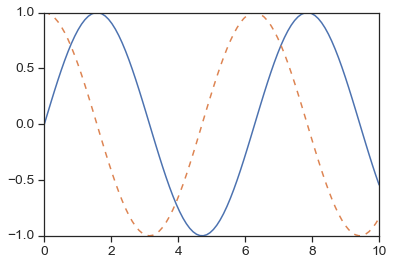

<Figure size 432x288 with 0 Axes>

In [173]:
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
plt.show()
plt.savefig('figure_3.png')

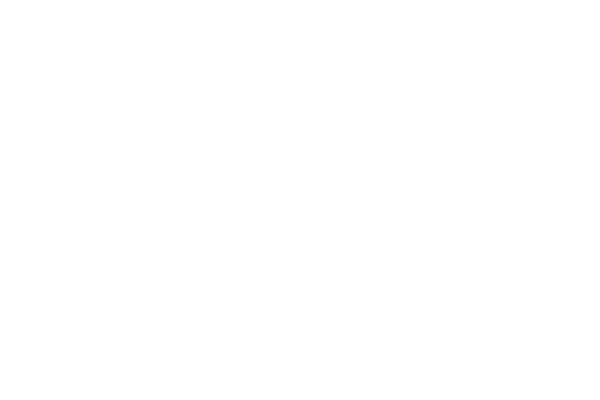

In [174]:
Image('figure_3.png')

Посмотрим на размеры файлов, которые у нас получились:

In [175]:
!ls -lh figure_*

-rw-r--r--  1 hanna.pylieva  staff    31K Oct  1 19:36 figure_1.png
-rw-r--r--  1 hanna.pylieva  staff    38K Sep  5 17:40 figure_2.jpg
-rw-r--r--  1 hanna.pylieva  staff    31K Oct  1 19:37 figure_2.png
-rw-r--r--  1 hanna.pylieva  staff   2.5K Sep  5 17:37 figure_3.jpg
-rw-r--r--  1 hanna.pylieva  staff   1.9K Oct  1 19:39 figure_3.png


Видим, что figure_3 - самая маленькая, потому что пустая, а figure_2 - самая большая, потому что больший dpi.

В какие форматы можем сохранять картинки из Python:

In [176]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Стили

Можно менять стили или создать собственный.  
Посмотреть , какие есть стили, можем следующим образом:

In [178]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Чтобы установить стиль для всех визуализаций в сессии:

In [348]:
plt.style.use('ggplot')

In [180]:
def make_a_plot(style_name):
    # Фиксируем рандомизацию
    np.random.seed(10)
    for i in range(4):
        plt.plot(np.random.rand(10))
    plt.title(style_name)
    plt.show()

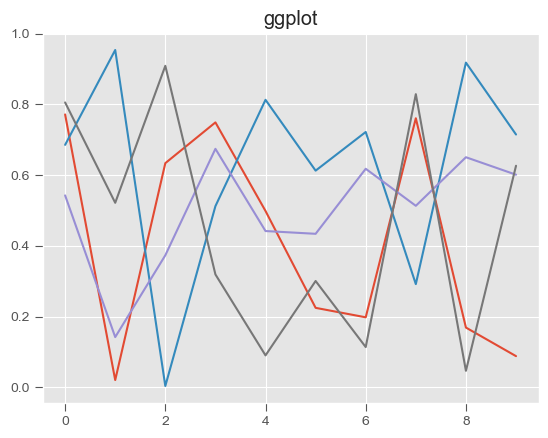

In [352]:
make_a_plot('ggplot')

Чтобы построить визуализацию с особым стилем:

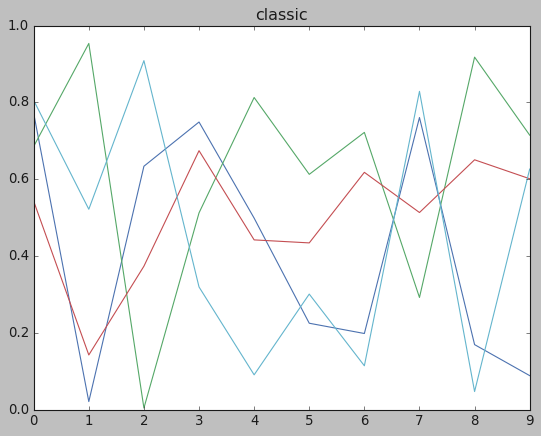

In [353]:
with plt.style.context('classic'):
    make_a_plot('classic')

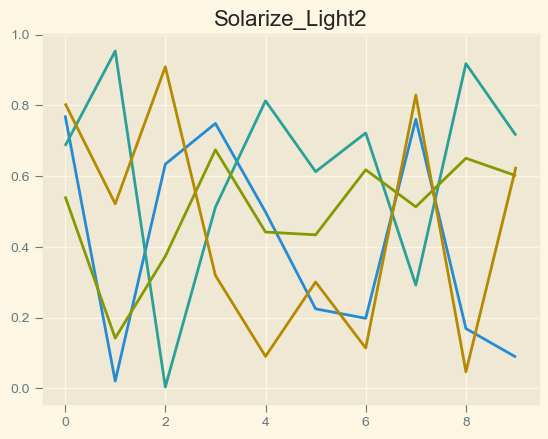

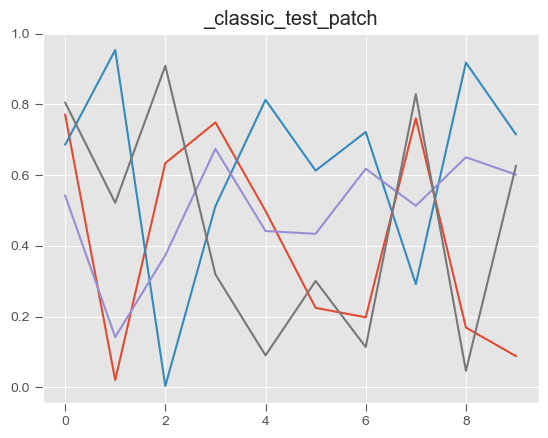

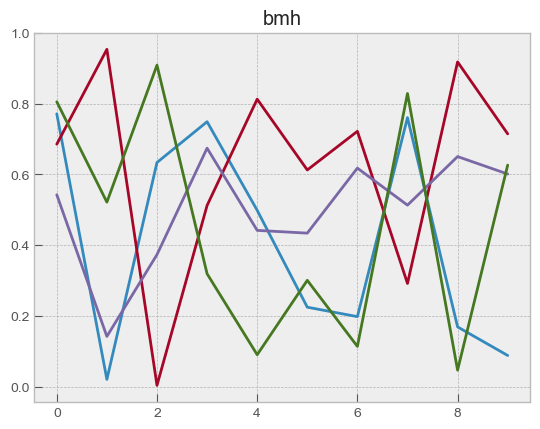

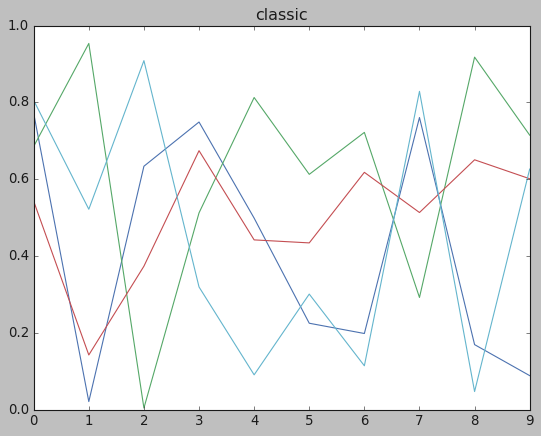

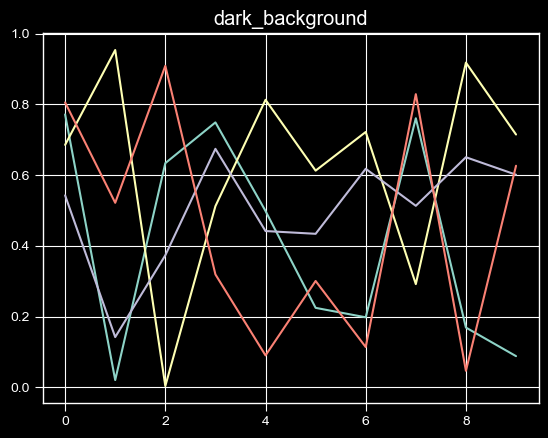

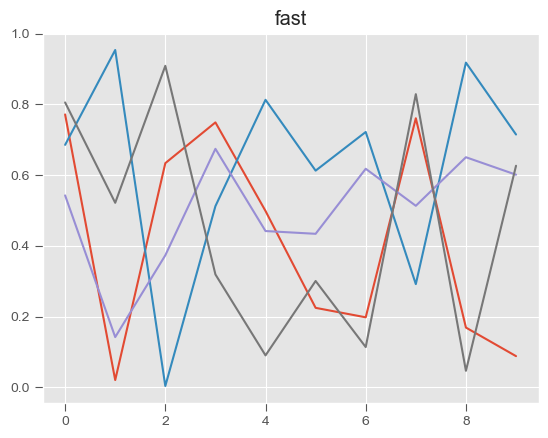

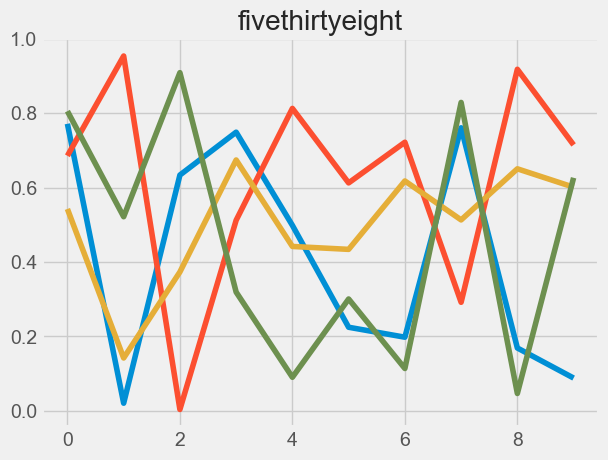

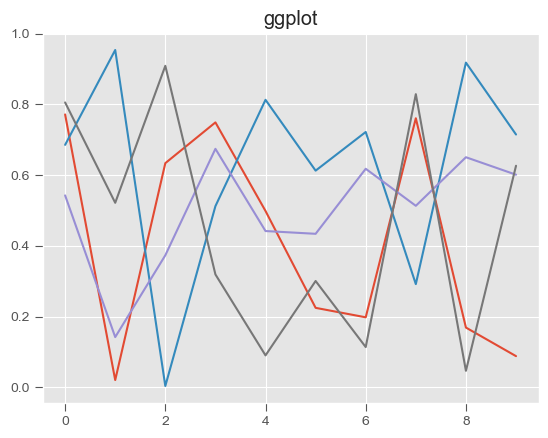

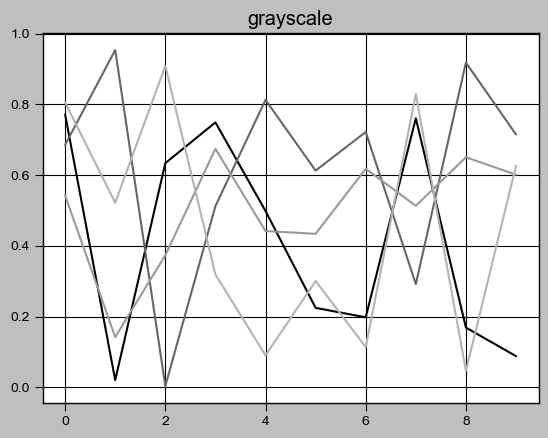

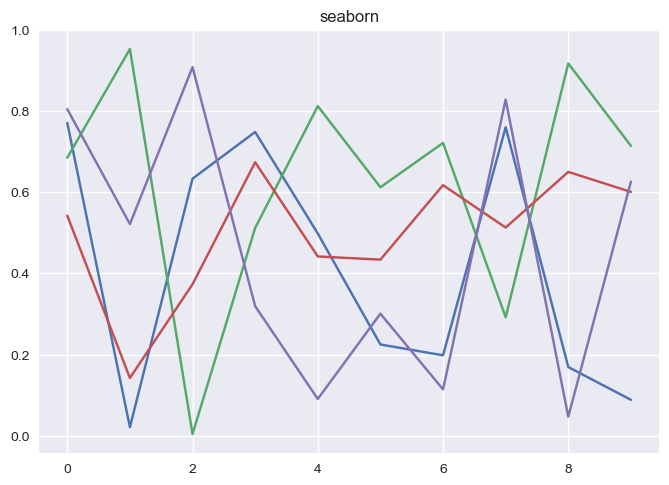

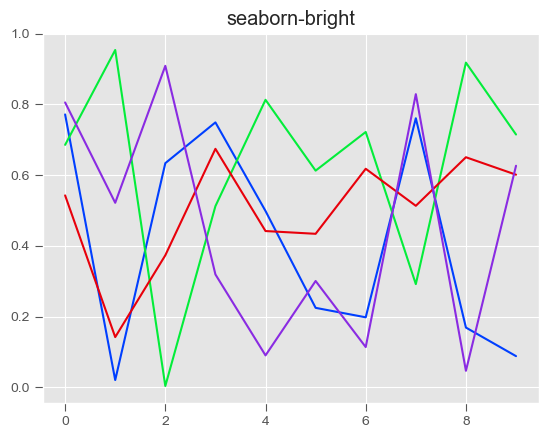

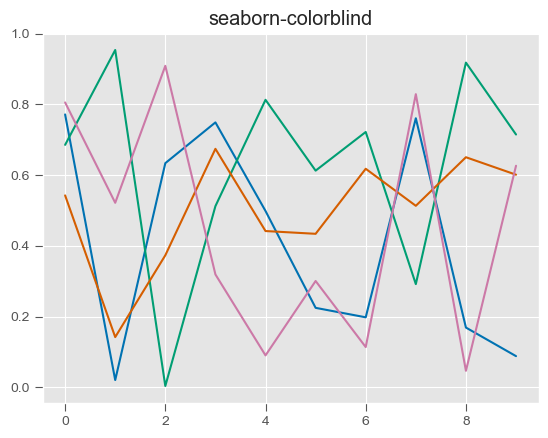

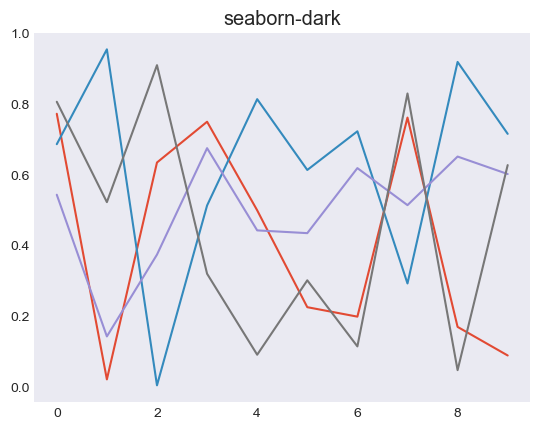

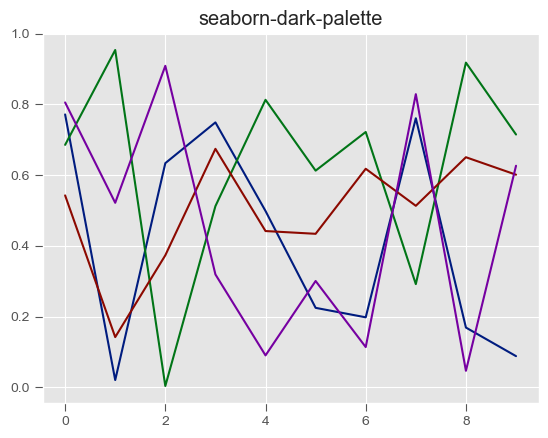

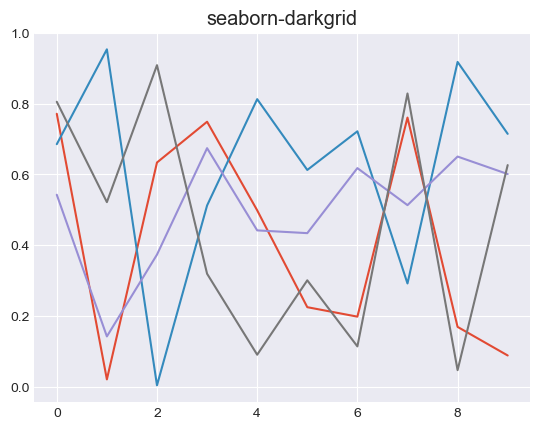

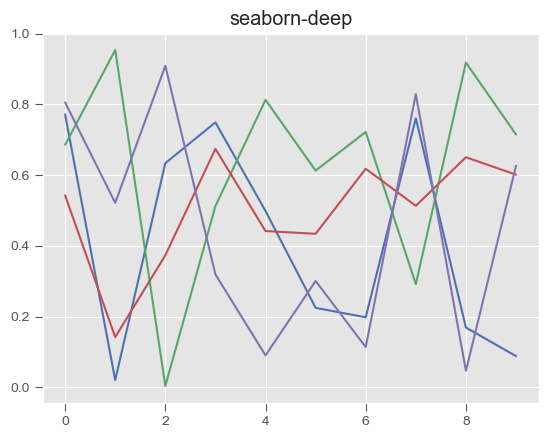

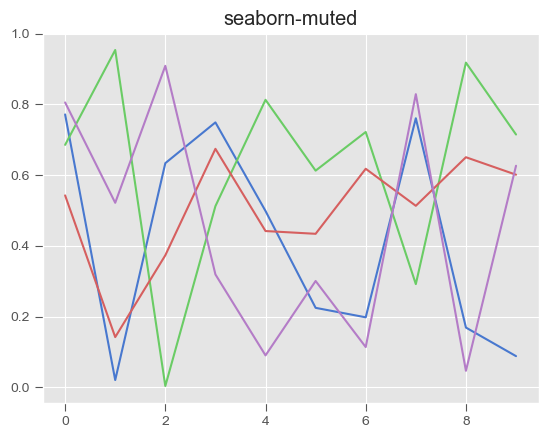

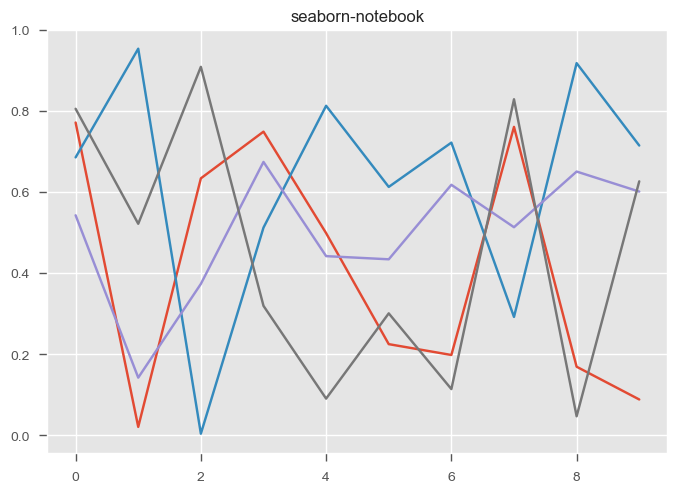

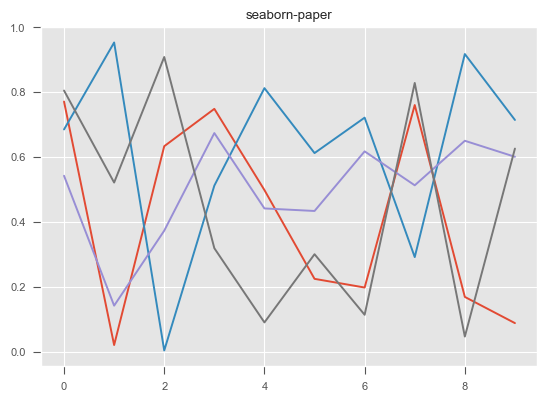

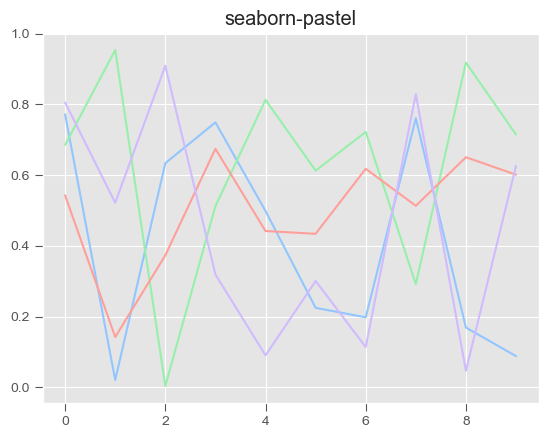

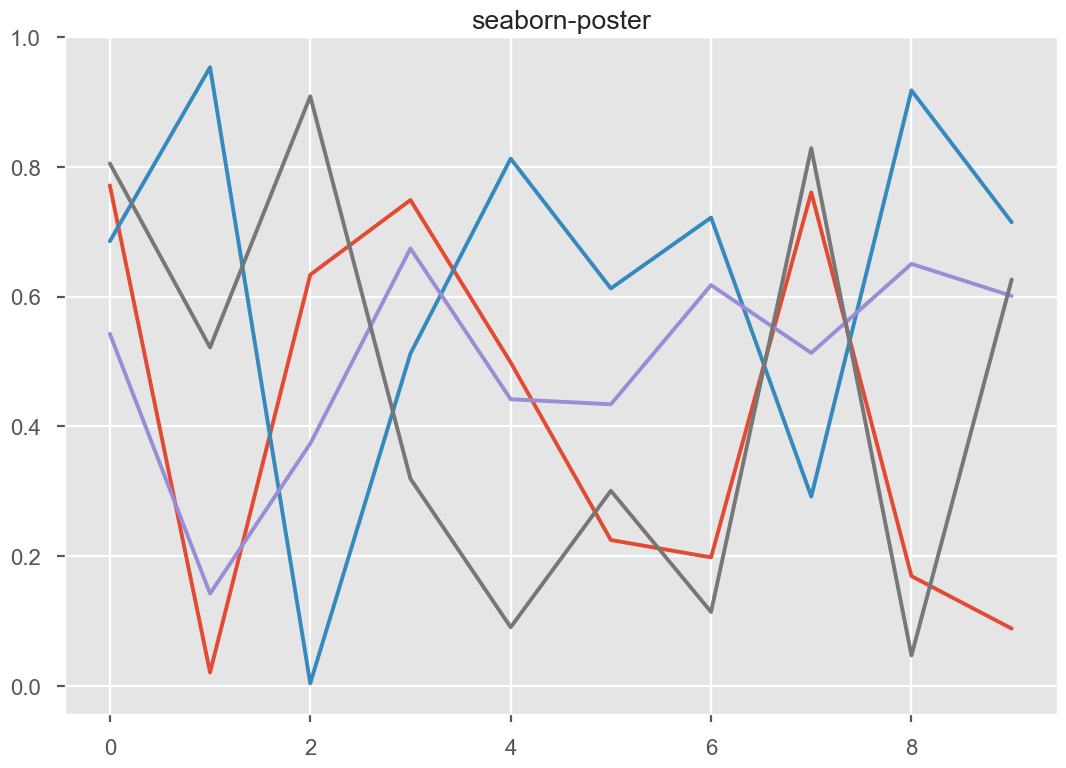

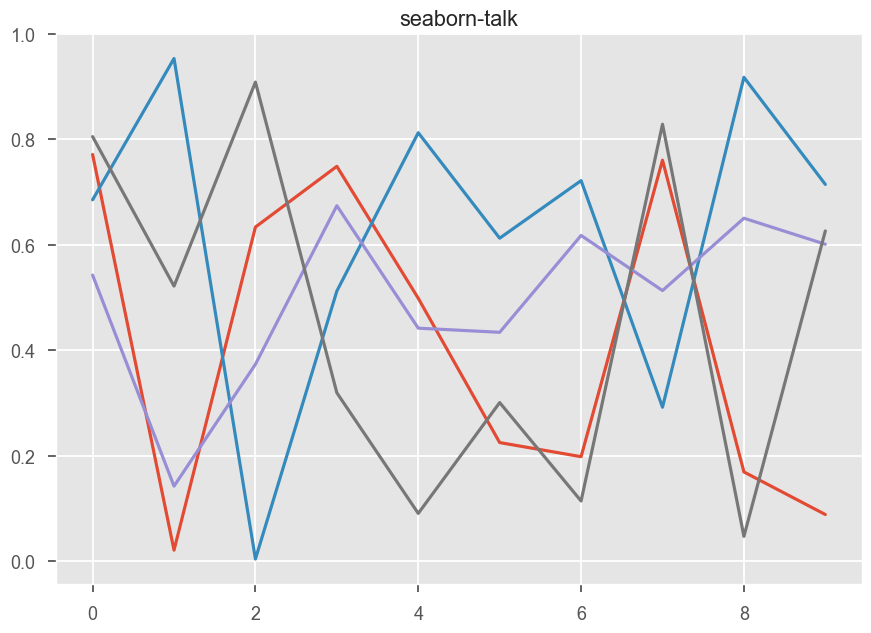

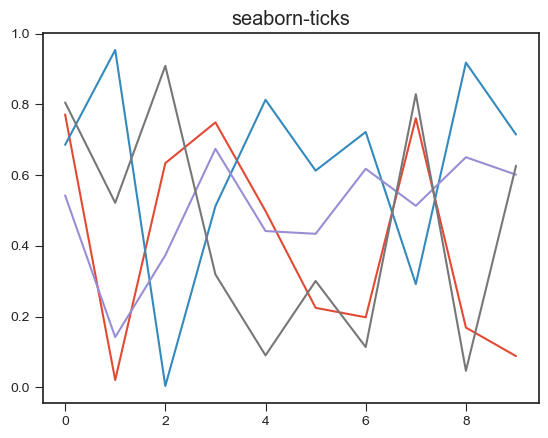

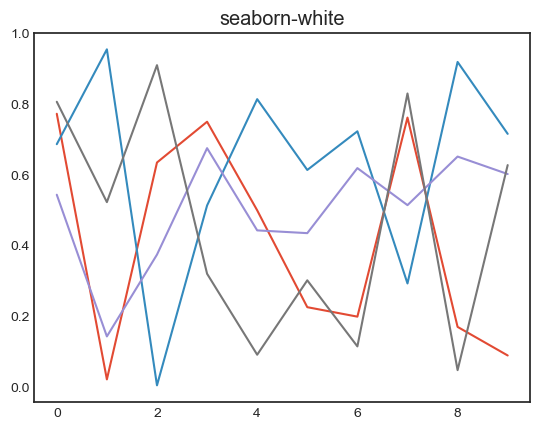

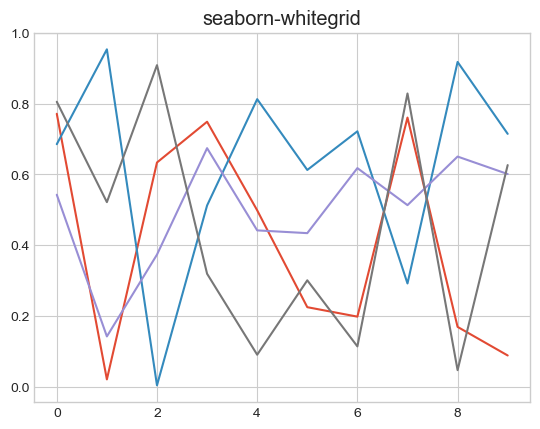

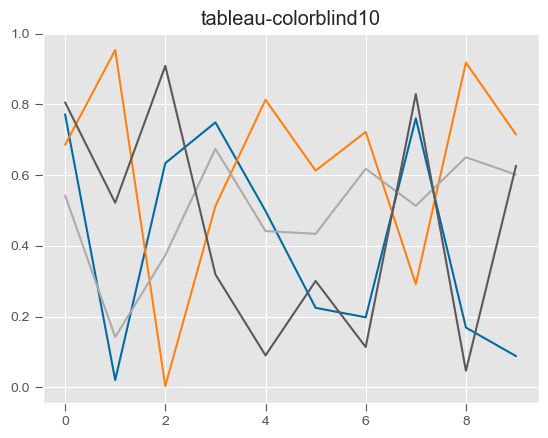

In [354]:
for c in plt.style.available:
    with plt.style.context(c):
        make_a_plot(c)

Вернуться к исходному стилю

In [356]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

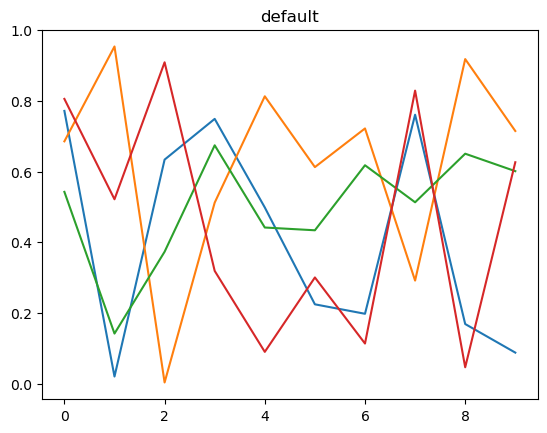

In [357]:
make_a_plot('default')

## Scatterplot (точечная диаграмма/диаграмма рассеянья)

Можно построить с помощью функции `plot`.

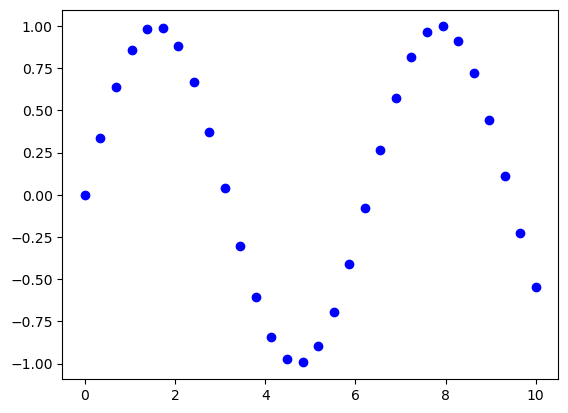

In [295]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='blue');

Можно указывать разные символы, которыми мы визуализируем точки, они все перечислены в документации и в основном из оозначение интуитивно понятное.

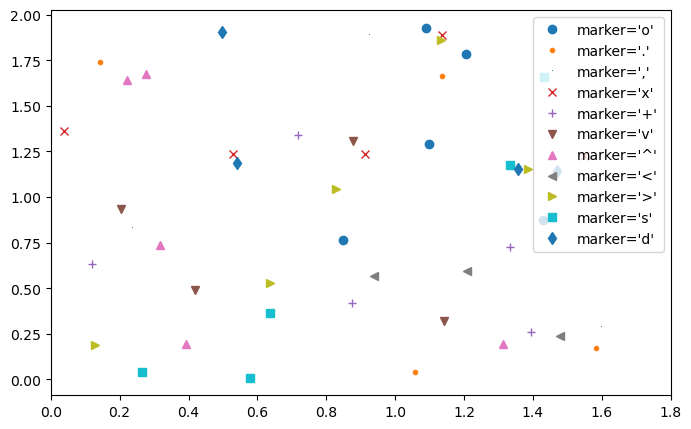

In [306]:
plt.figure(figsize=(8,5))
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5)*2, rng.rand(5)*2, marker,
             label="marker='{0}'".format(marker), linewidth=4)
plt.legend(loc = 'upper right')
plt.xlim(0, 1.8);

Можно даже использвоать несколько символов вместе для отображения линии, к примеру:

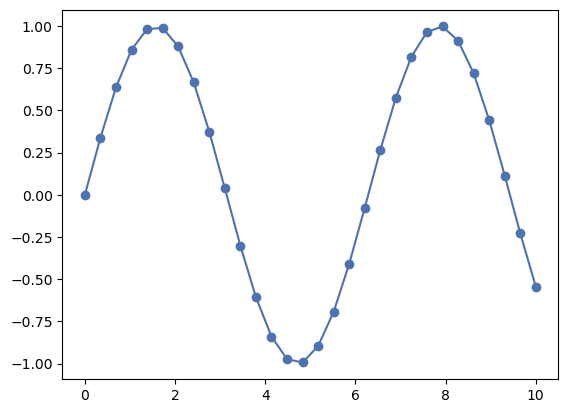

In [307]:
plt.plot(x, y, '-ob');

У маркеров есть куча других дополнительных настрек:

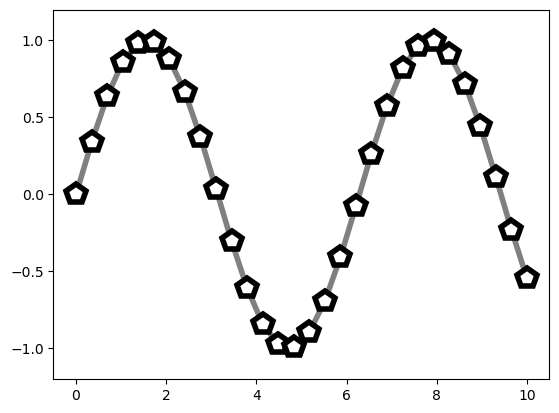

In [358]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=4)
plt.ylim(-1.2, 1.2);

Альтернативно мы можем построить скаттерплот c помощью метода `scatter`:

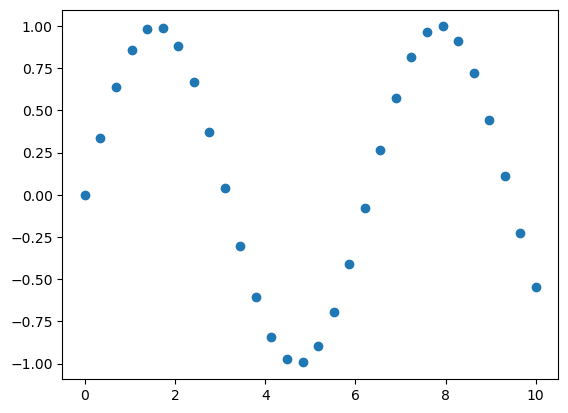

In [359]:
plt.scatter(x, y, marker='o');

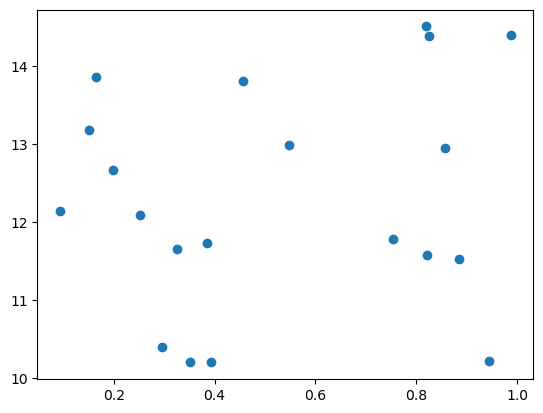

In [360]:
plt.scatter(np.random.rand(20), 10+5*np.random.rand(20));

Основное отличие `plt.scatter` от `plt.plot` заключается в том, что его можно использовать для создания диаграмм рассеяния,   
где свойства каждой отдельной точки (размер, цвет заполнения, цвет границы и т.д.) можно индивидуально контролировать или сопоставить с данными.  
Вот пример, как это может быть полезно в реальных ситуациях. Визуализируем данные из известного Iris набора данных, который доступен в scikit-learn:

In [361]:
import sklearn.datasets as ds

In [362]:
from sklearn.datasets import load_iris

In [363]:
iris = load_iris()

In [364]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [365]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [366]:
iris.feature_names[2]

'petal length (cm)'

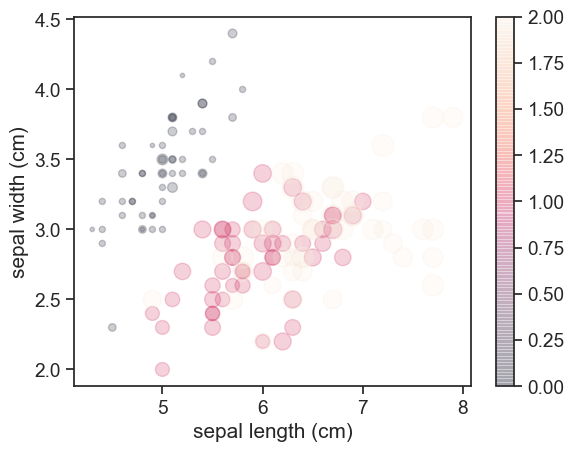

In [419]:
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar();
# вывести легенду цветов в скатерплоте в матплотлиб не выйдет, только colorbar значений

Описание датасета:

Мы видим, что этот график рассеяния дал нам возможность одновременно исследовать четыре различных измерения данных:  
- положение (x, y) каждой точки соответствует длине и ширине чашелистика, 
- размер точки связан с шириной лепестка, 
- а цвет зависит от конкретного вида цветка.   

Такие многоцветные и многоэлементные точечные диаграммы могут быть полезны как во время исследования, так и для представления данных.

## Гистрограммы и график плотности

In [368]:
np.random.seed(10)
data = np.random.randn(1000)

Базовый вариант построения гистограммы:

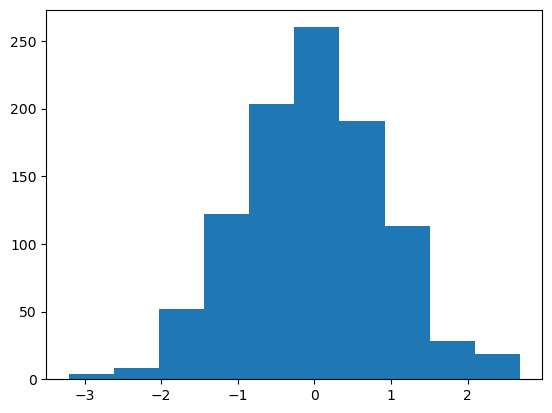

In [369]:
plt.hist(data);

Построить в matplotlib KDE просто не получится, а в seaborn это делается вызовом одной команды.

Функция `hist()` имеет множество опций для настройки как вычислений, так и отображения. 
Пример более кастомизированной гистограммы, которая за счёт нормализации уже является графиком плотности:

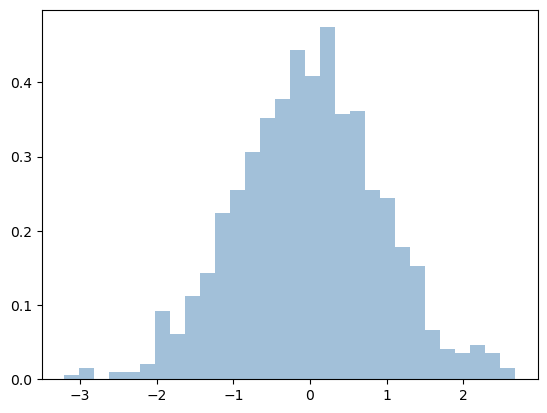

In [370]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

Вот так удобно отображать несколько гистограм на одной панели для сравнения выборок:

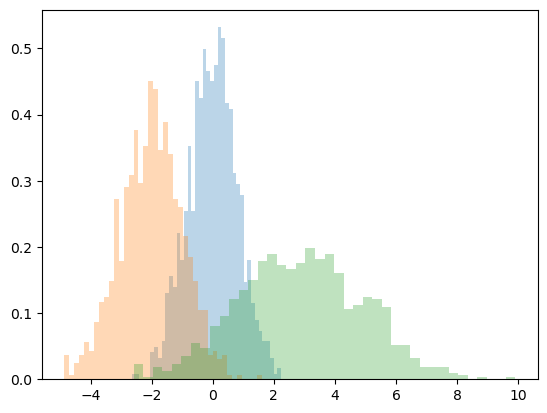

In [371]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

А вообще вот так по-разному можно это сделать:

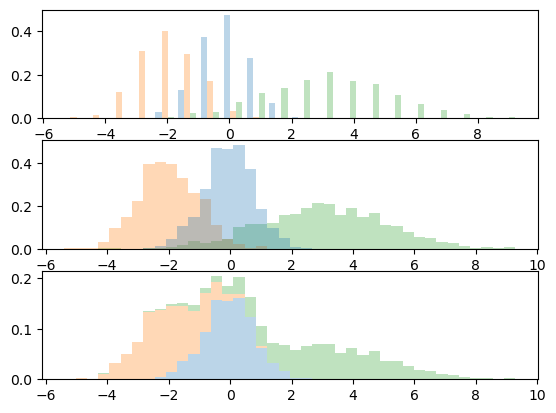

In [372]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

data = [x1, x2, x3]

fig, ax = plt.subplots(3)

ax[0].hist(data, alpha=0.3, density=True, bins=20)
ax[1].hist(data, histtype='stepfilled', alpha=0.3, density=True, bins=40)
ax[2].hist(data, histtype='barstacked', alpha=0.3, density=True, bins=40)

plt.show()

Если нам надо просто посмотреть на распределение данных, сколько в какой бин попало записей, то делаем это с помощью numpy:

In [373]:
np.histogram(data, bins=5)

(array([ 338, 1500,  739,  370,   53]),
 array([-5.39310861, -2.45757294,  0.47796272,  3.41349839,  6.34903406,
         9.28456973]))

Я часто для удобства просмотра результата делаю так:

In [374]:
df = pd.DataFrame(np.histogram(data, bins=5)).T
df.columns=['count', 'x']
df

count         x
0   338.0 -5.393109
1  1500.0 -2.457573
2   739.0  0.477963
3   370.0  3.413498
4    53.0  6.349034
5     NaN  9.284570

Это значит, что со значениями от -5.393109 до -2.457573 у нас 338 записей.

## Barplots

Иногда нам нужна не гистограмма, а просто столбчатая диаграмма.

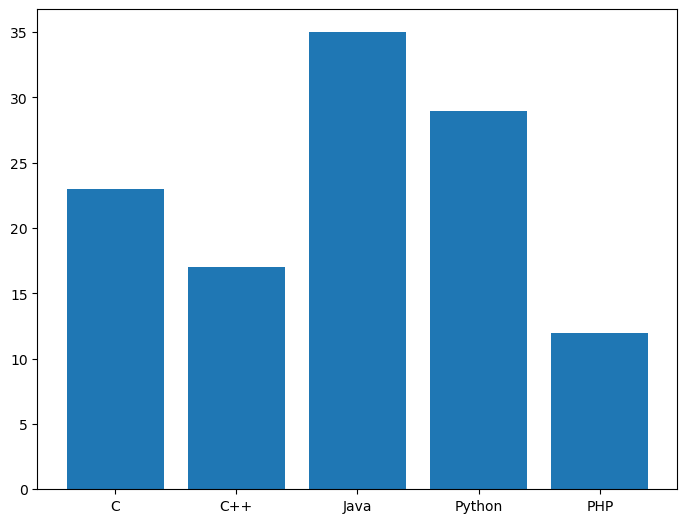

In [375]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs, students)
plt.show()

Можем и синусоиду с помощью столбчатой диаграммы отобразить:

<BarContainer object of 30 artists>

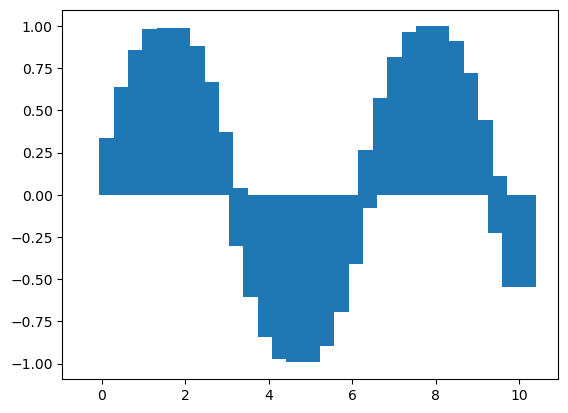

In [376]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.bar(x,y)

Вот так мы можем отобразить данные с помощью столбчатой диаграммы:

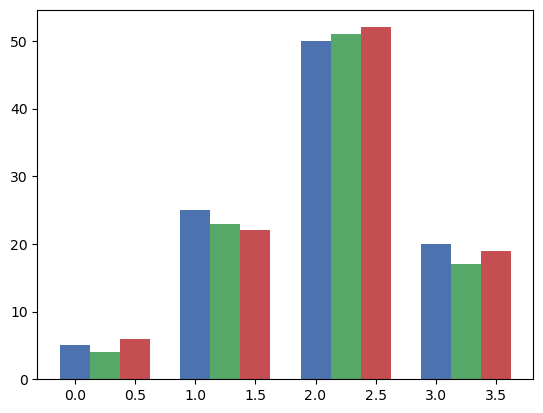

In [377]:
data = [[5., 25., 50., 20.],
      [4., 23., 51., 17.],
      [6., 22., 52., 19.]]

X = np.arange(4)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.bar(X + 0.50, data[2], color = 'r', width = 0.25)

plt.show()

То же самое можем сделать через `ax` методы. И давайте обернём данные в DataFrame вместо Numpy array.

In [378]:
data

[[5.0, 25.0, 50.0, 20.0], [4.0, 23.0, 51.0, 17.0], [6.0, 22.0, 52.0, 19.0]]

In [379]:
data_df = pd.DataFrame(data, 
                    columns=range(2018,2022))

In [380]:
data_df

2018  2019  2020  2021
0   5.0  25.0  50.0  20.0
1   4.0  23.0  51.0  17.0
2   6.0  22.0  52.0  19.0

<BarContainer object of 4 artists>

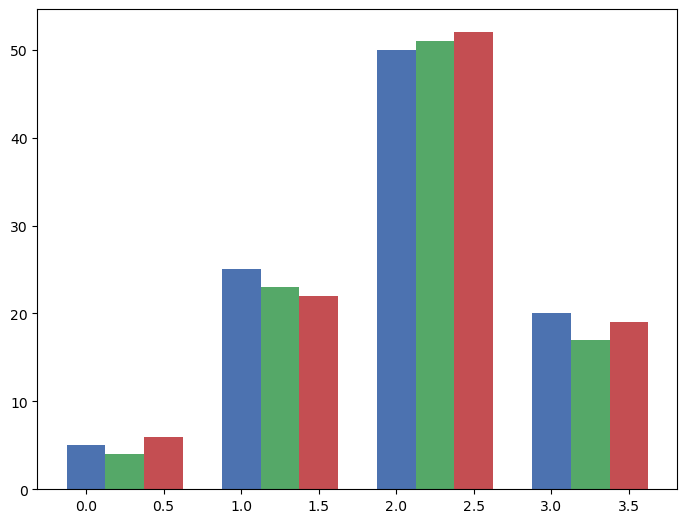

In [381]:
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data_df.loc[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data_df.loc[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data_df.loc[2], color = 'r', width = 0.25)

В случае с DataFrame мы можем отобразить данные проще:

In [382]:
data_df

2018  2019  2020  2021
0   5.0  25.0  50.0  20.0
1   4.0  23.0  51.0  17.0
2   6.0  22.0  52.0  19.0

<AxesSubplot:>

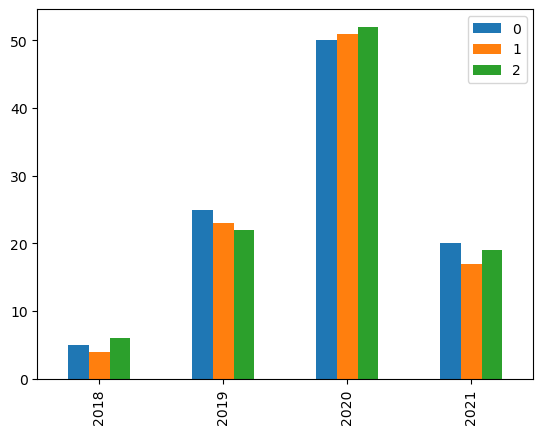

In [383]:
data_df.T.plot.bar()

## Stacked barplot 

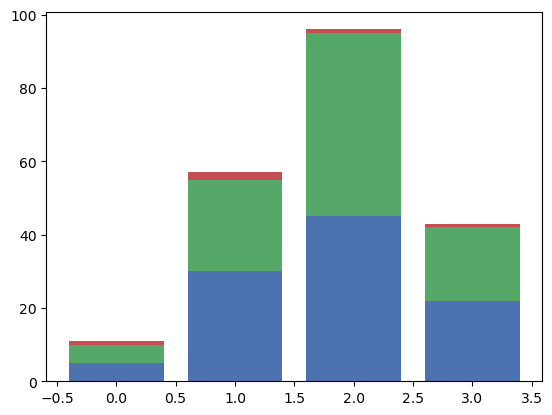

In [384]:
A = np.array([5., 30., 45., 22.])
B = np.array([5., 25., 50., 20.])
C = np.array([1.,  2.,  1.,  1.])
X = np.arange(4)

plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'g', bottom = A)
plt.bar(X, C, color = 'r', bottom = A + B)

plt.show()

Пример, где может быть полезно + то, как это делать через `ax` методы:

In [385]:
ind

array([0, 1, 2, 3, 4])

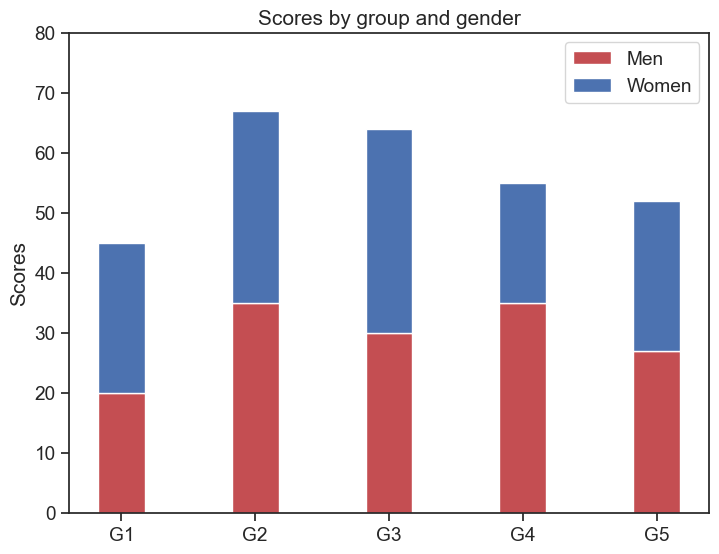

In [417]:
men_mean_scores = (20, 35, 30, 35, 27)
women_mean_scores = (25, 32, 34, 20, 25)
ind = np.arange(5) # the x locations for the groups
width = 0.35

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, men_mean_scores, width, color='r')
ax.bar(ind, women_mean_scores, width, bottom=men_mean_scores, color='b')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
# так устанавливаются текстовые лейблы
ax.set_xticks(ind) # values
ax.set_xticklabels(['G1', 'G2', 'G3', 'G4', 'G5']) # labels
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Men', 'Women'])
plt.show()

# Визуализация в Pandas

Pandas имеет методы визуализации датафреймов, которые являются надстройкой на Matplotlib.

In [4]:
df = pd.read_csv('../data/health_insurance_cross_sell_prediction/train.csv', index_col='id')

In [388]:
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
id                                                                              
1     Male   44                1         28.0                   0   > 2 Years   
2     Male   76                1          3.0                   0    1-2 Year   
3     Male   47                1         28.0                   0   > 2 Years   
4     Male   21                1         11.0                   1    < 1 Year   
5   Female   29                1         41.0                   1    < 1 Year   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
id                                                                          
1             Yes         40454.0                  26.0      217         1  
2              No         33536.0                  26.0      183         0  
3             Yes         38294.0                  26.0       27         1  
4              No         28619.0                 152.0      203         0  
5              No         27496.0                 152.0       39         0

In [389]:
df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Визуализация данных

Метод `scatter_matrix` позволяет визуализировать попарные зависимости между признаками и распределение каждого признака на диагонали.

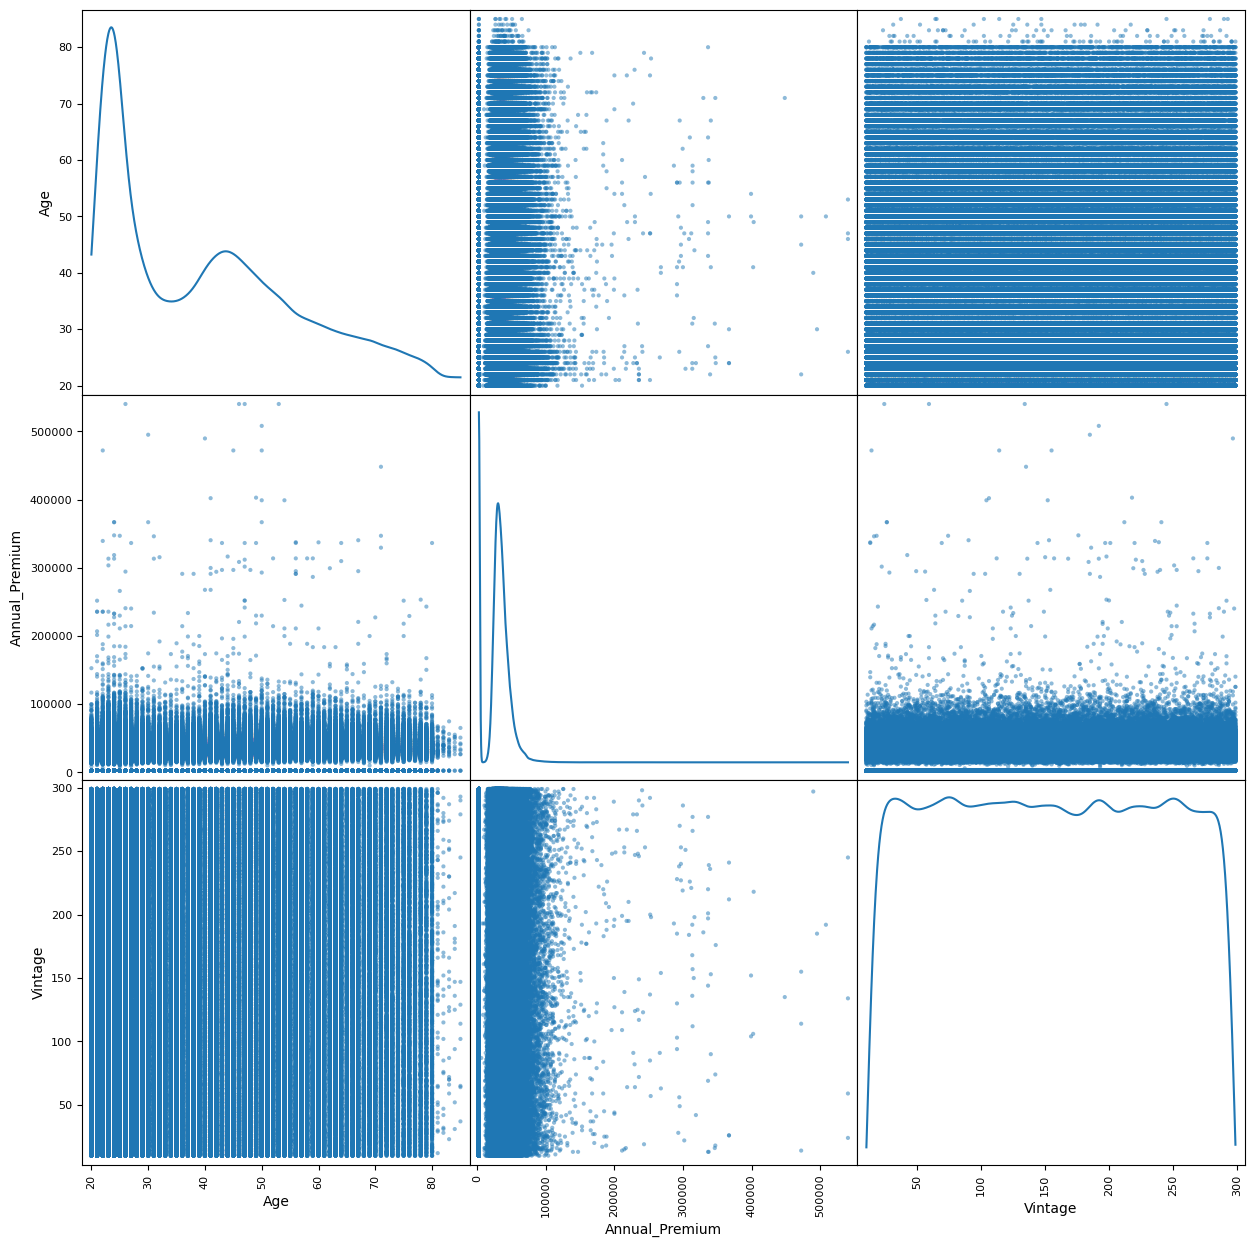

In [390]:
pd.plotting.scatter_matrix(
    df[['Age', 'Annual_Premium', 'Vintage']], figsize=(15, 15), diagonal="kde"
)
plt.show()

Для каждого признака можно построить гистограмму отдельно:

<AxesSubplot:>

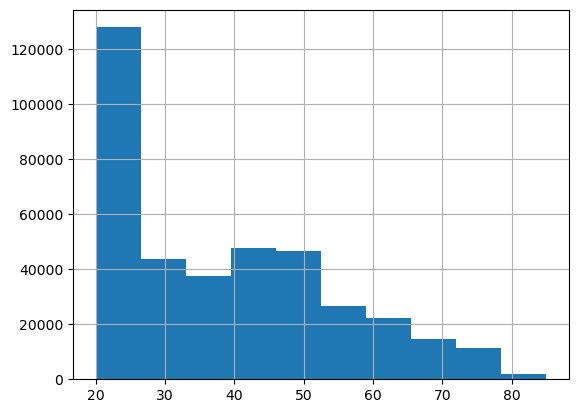

In [391]:
df["Age"].hist()

In [392]:
df.Age.value_counts()

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

Подозрительно много людей с возрастом 20 лет. Возможно, это значение возраста по умолчанию.


Также мы можем построить гистограммы сразу для всех признаков.  

**Внимание:** типы данных в данном наборе данных изначально некорректные. Мы будем учиться их исправлять в лекции 6. А пока визуализируем данные как есть.

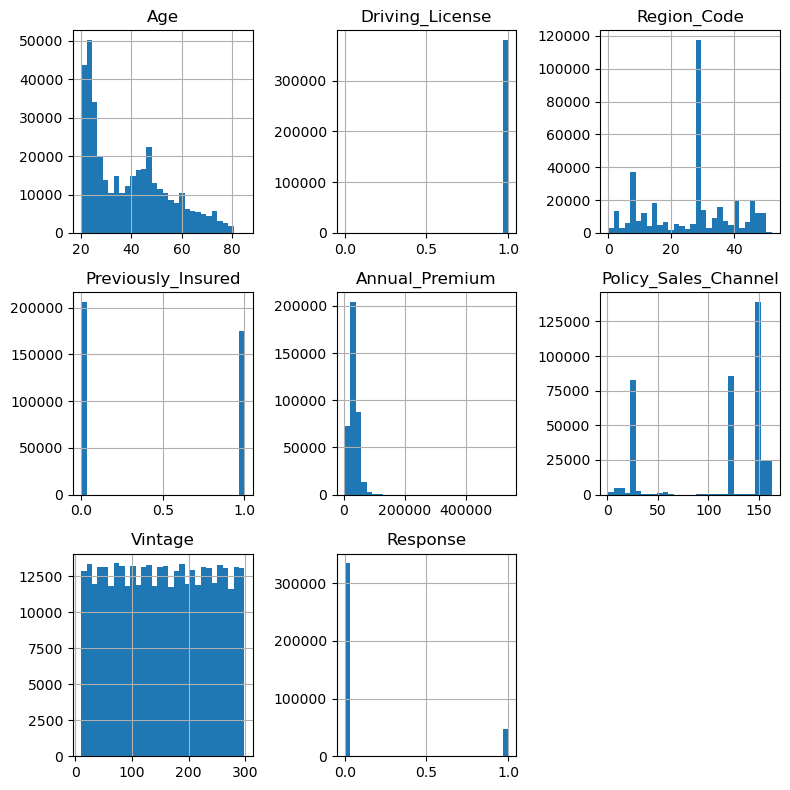

In [393]:
df.hist(bins=30, figsize=(8,8))
plt.tight_layout()
plt.show()

Полезным также является график типа **box plot** ("ящик с усами"). Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

In [394]:
categorical_cols =['Gender', 'Vehicle_Damage']
numeric_cols = [ 'Age', 'Vintage']

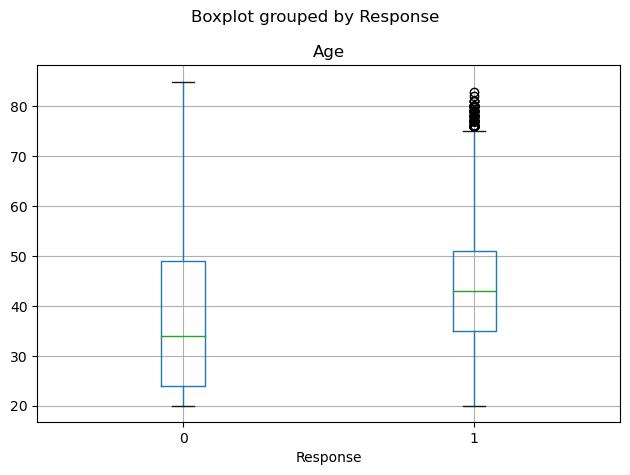

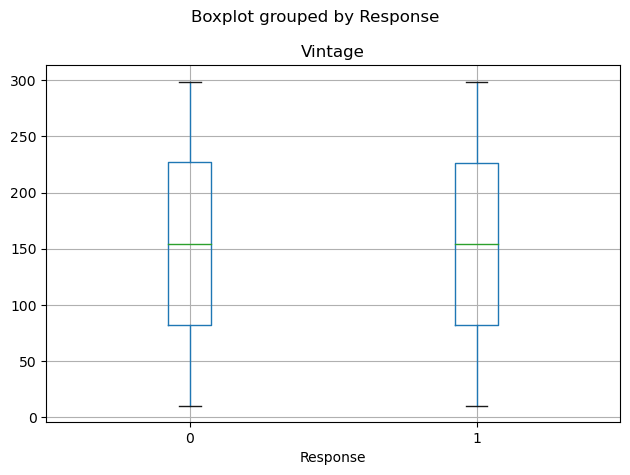

In [395]:
from tqdm import notebook

def plt_box_plot(dataset, columnName):
    """
    Plots boxplots for column given as parameter.
    """
    dataset.boxplot(by="Response", column=columnName)
    plt.tight_layout();
    
for column in notebook.tqdm(numeric_cols, desc = "Our charts are being ready"):
    plt_box_plot(df, column)

В качестве параметра `by` мы можем передавать не только один признак, но и список:

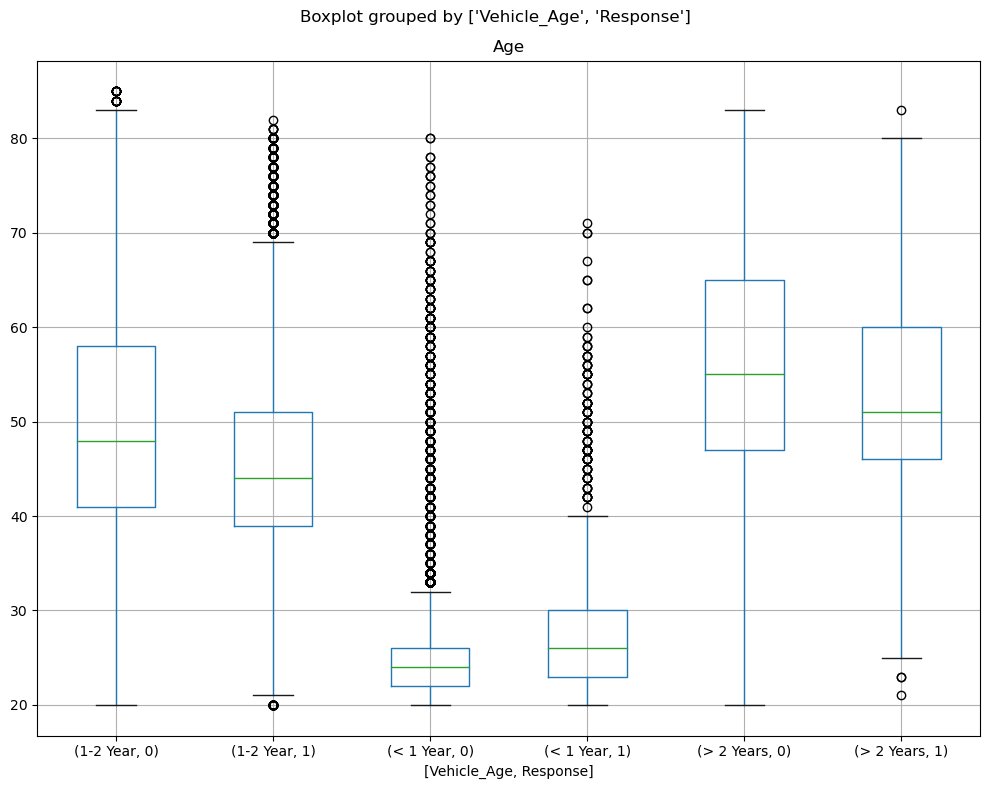

In [396]:
df.boxplot(column="Age", by=["Vehicle_Age", "Response"], figsize=(10,8))
plt.tight_layout()
plt.show()

Аналогично мы можем строить любые другие диаграмы из данных DataFrame-а:

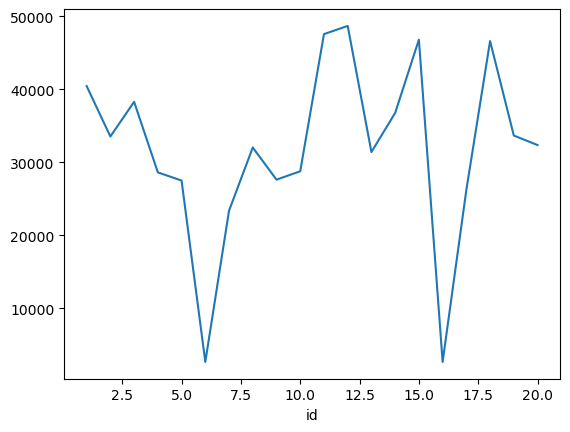

In [397]:
df.Annual_Premium[:20].plot();

Функция плотности:

<AxesSubplot:ylabel='Density'>

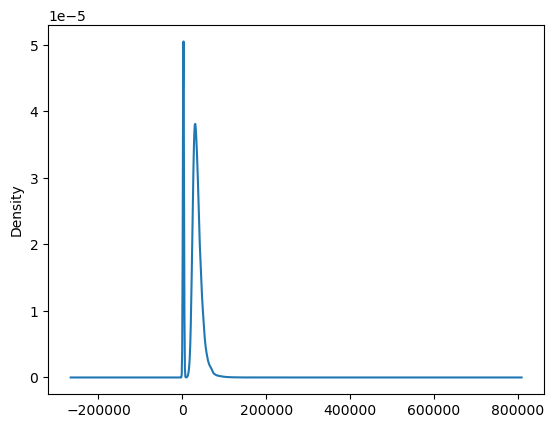

In [399]:
df.Annual_Premium.plot.kde()

Функция распределения вероятностей:

<AxesSubplot:>

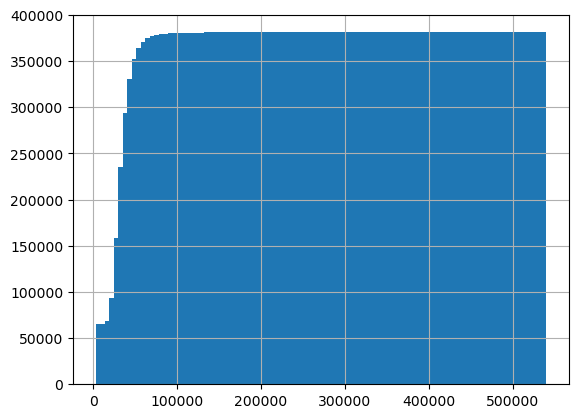

In [400]:
df.Annual_Premium.hist(cumulative=True, bins=100)

Также, фукнцию плотности мы можем нарисовать через seaborn:

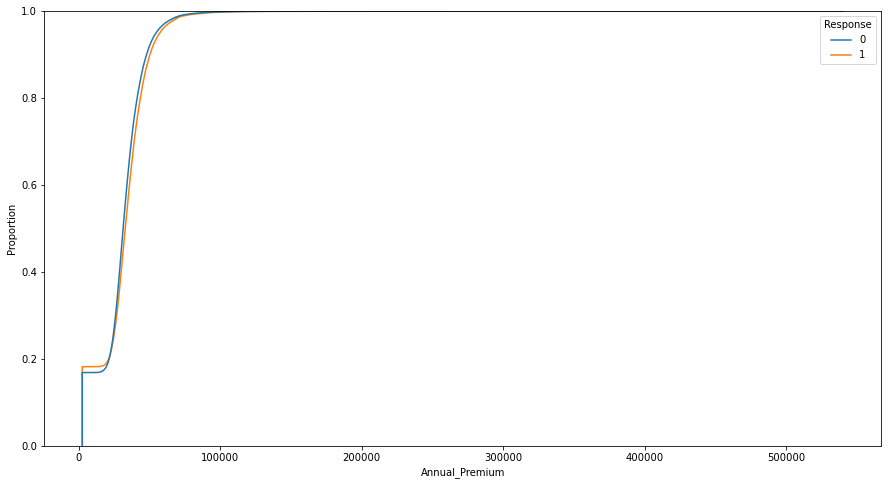

In [5]:
plt.figure(figsize=(15,8))
sns.ecdfplot(df, x="Annual_Premium", hue='Response');

Похоже, после 100k идёт много аутлайеров, давайте посмотрим, как распределены значения до 100k. Также похоже минимальное значение повторяется много раз, сделаем ограничение по интервалу, который не включает минимальное значение переменной.

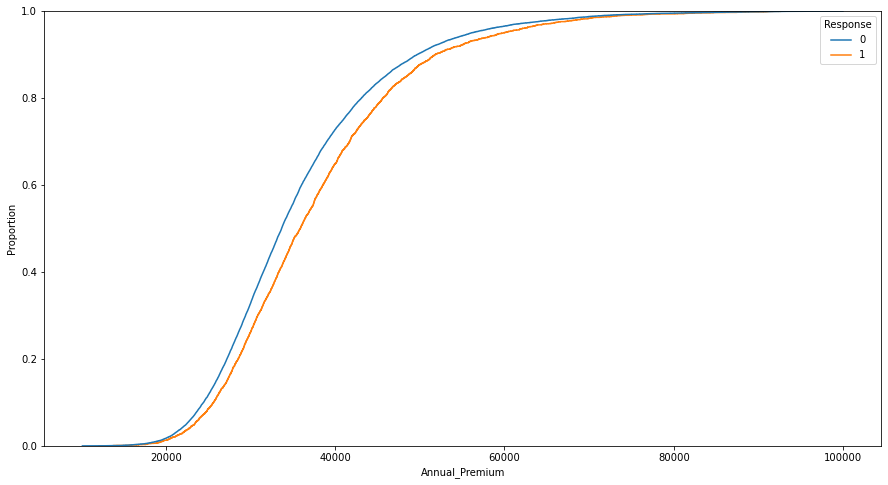

In [7]:
df.Annual_Premium.value_counts()

plt.figure(figsize=(15,8))
sns.ecdfplot(df[df.Annual_Premium.between(df.Annual_Premium.min(),1e5, inclusive=False)].sample(frac=0.1), x="Annual_Premium", hue='Response');

## Визуализация таблиц

https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [401]:
np.random.seed(0)
df2 = pd.DataFrame(np.random.randn(10,4), columns=['A','B','C','D'])
df2.style

In [402]:
df2.style.background_gradient(cmap='YlGn')

Цветовые карты в matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html 

In [403]:
def style_negative(v, props=''):
    return props if v < 0 else None

s2 = df2.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2

In [404]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

Выделение Null values

In [405]:
df2.iloc[0,2] = np.nan
df2.iloc[4,3] = np.nan
df2.loc[:4].style.highlight_null(null_color='yellow')

In [406]:
df2.style.bar(subset=['A', 'B'], align='mid', color=['#d65f5f', '#5fba7d'])

# Визуализация в Seaborn

Seaborn - обёртка matplotlib с более удобным интерфейсом в некоторых случаях и более приятным стандартным стилем.

In [10]:
import seaborn as sns

In [408]:
sns.set_theme()

In [11]:
penguins = sns.load_dataset("penguins")

In [12]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

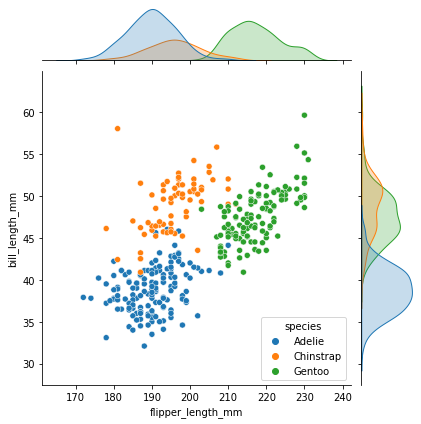

In [13]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

В seaborn `pairplot` - аналог `scatterplot` в matplotlib

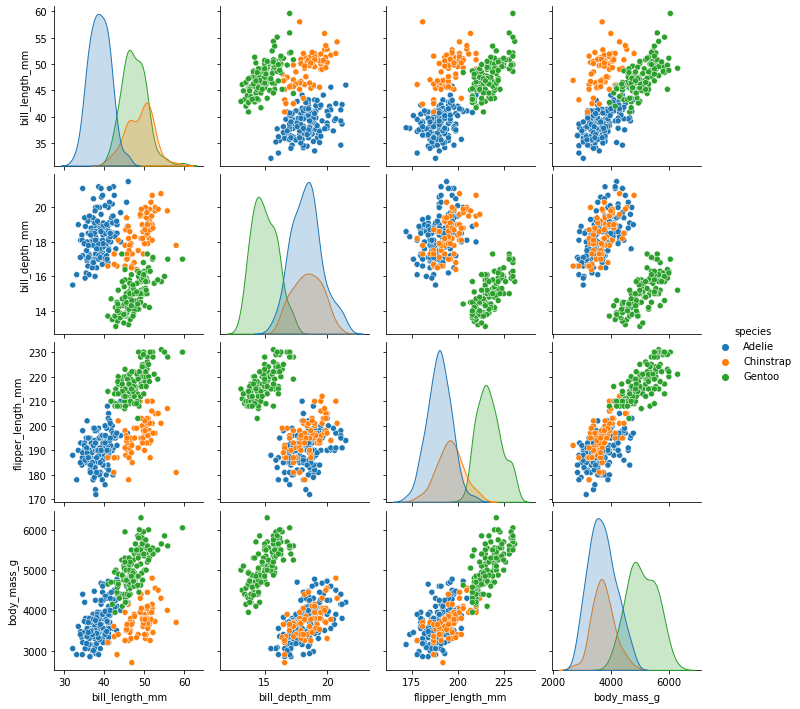

In [15]:
sns.pairplot(data=penguins, hue="species");

## Модификации pairplot

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
from scipy.stats import pearsonr

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

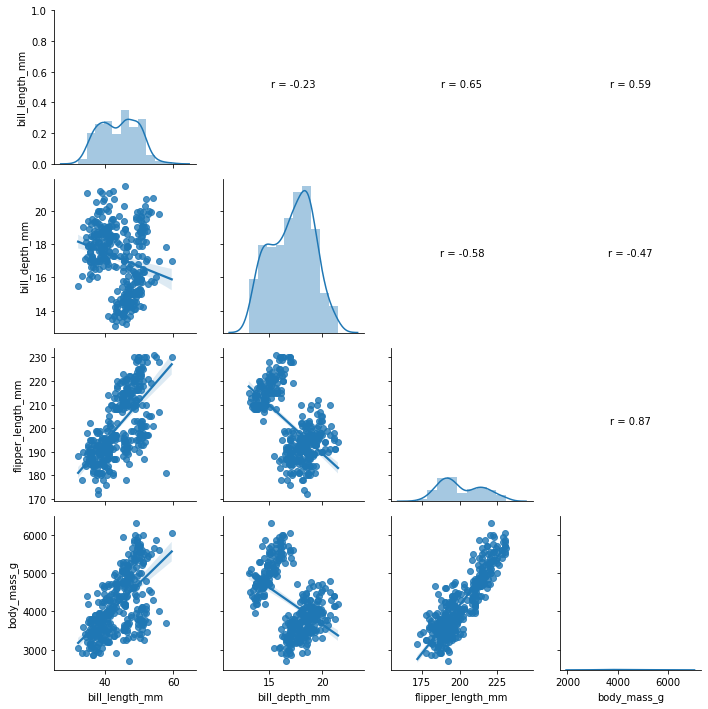

In [18]:
g = sns.PairGrid(penguins.dropna())

g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef);

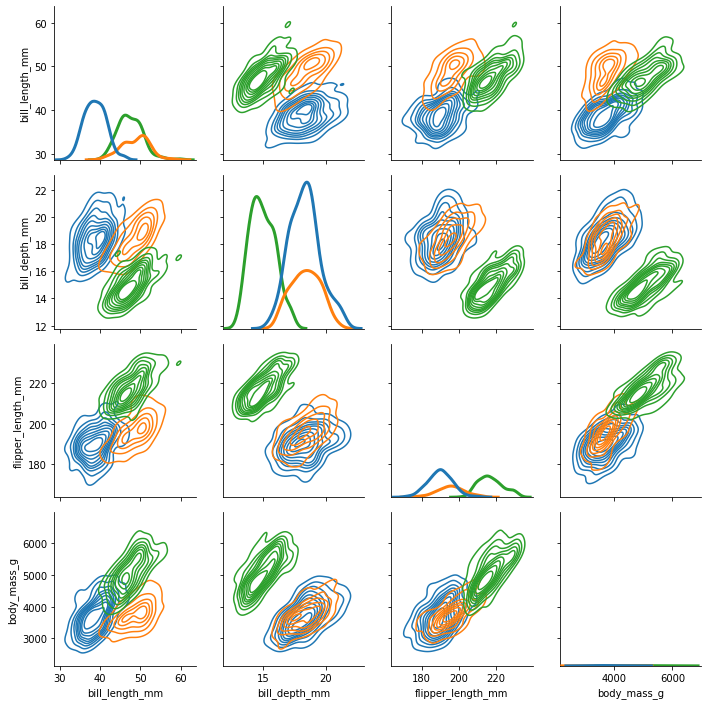

In [19]:
g = sns.PairGrid(penguins, hue="species", hue_kws={"cmap": ["Blues", "Greens", "Reds"]})
g = g.map_diag(sns.kdeplot, lw=3)
g = g.map_offdiag(sns.kdeplot, lw=1)

plt.show()

## Настройки в seaborn

Можно устанавливать закрашивание точек в параметре `hue`.

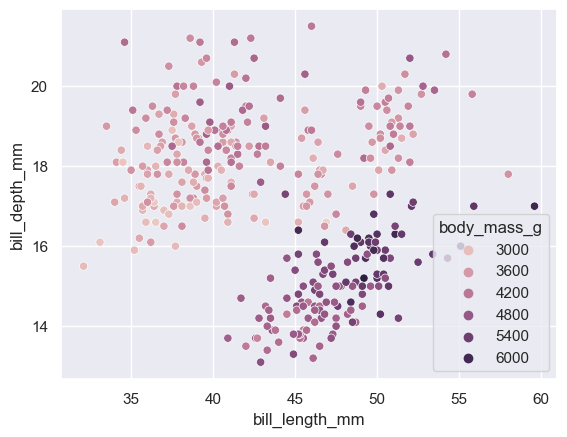

In [412]:
sns.scatterplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
);

Можем менять тему и добавлять настройки:

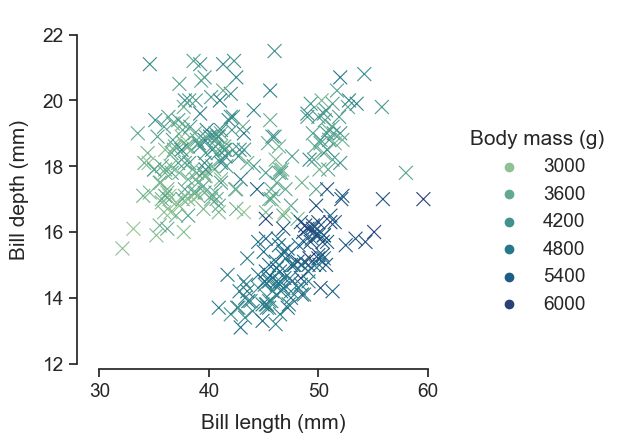

In [413]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True);

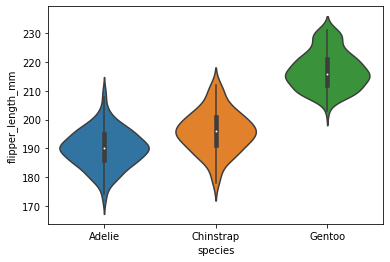

In [21]:
sns.violinplot(x="species", y="flipper_length_mm", data=penguins, size=8);

## Тепловая карта

In [21]:
DATA = Path('../data/')
df = pd.read_csv(DATA / 'health_insurance_cross_sell_prediction/train.csv')

In [22]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Построим график корреляций с тепловй раскраской.

In [23]:
corr_data = df.drop(['id'],axis = 1)

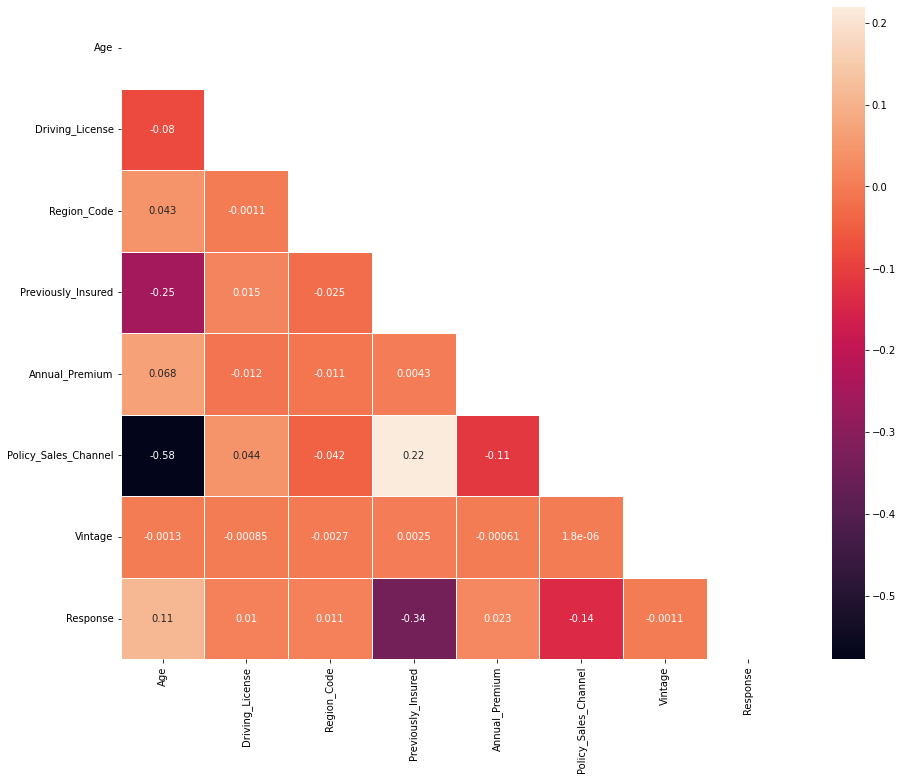

In [24]:
plt.figure(figsize=(15, 12))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

## matplotlib vs seaborn

Хотя вы можете работать продуктивно, используя только функции seaborn, полная настройка вашей графики потребует некоторых знаний концепций и API matplotlib.  
Одним из аспектов кривой обучения для новых пользователей seaborn будет знание того, что для достижения конкретной настройки необходимо перейти на уровень matplotlib.   
С другой стороны, пользователи, пришедшие из matplotlib, обнаружат, что большая часть их знаний применима к seaborn.

Matplotlib имеет всеобъемлющий и мощный API; практически любой атрибут фигуры можно изменить по своему вкусу.   
Комбинация высокоуровневого интерфейса seaborn и широких возможностей настройки matplotlib позволит вам как  
быстро исследовать свои данные, так и создавать графику, которая может быть адаптирована в конечный продукт публикационного качества.

Напоследок построим несколько тех же визуализаций, что мы строили с помощью matplotlib, но через seaborn, чтобы сравнить вид.

### Box plot

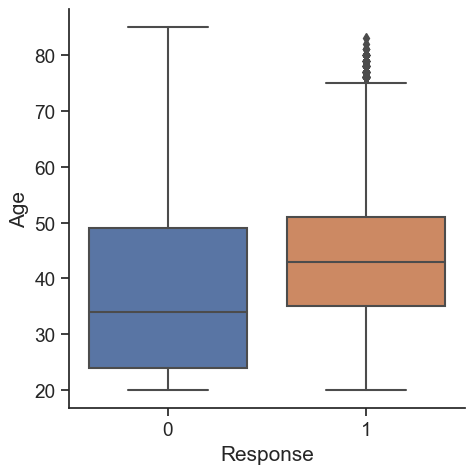

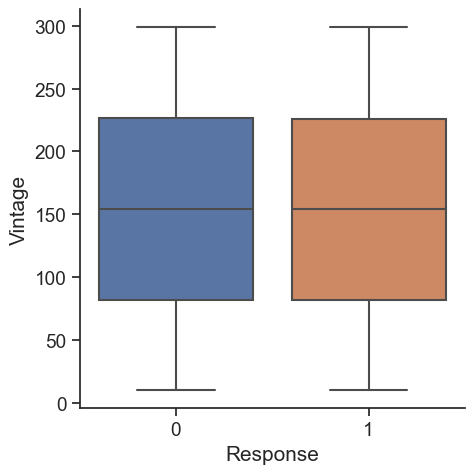

In [414]:
def sns_box_plot(dataset, columnName):
    """
    Plots boxplots for column given as parameter.
    """
    sns.catplot(x="Response", y=columnName, data=dataset, kind="box");

        
for column in notebook.tqdm(numeric_cols, desc = "Our charts are being ready"):
    sns_box_plot(df, column)

В seaborn box plots выглядят симпотичнее и понятнее.

### Pair plot

В отличие от pd.scatter_matrix в sns.pairplot можно указать цвет точек, это бывает полезно для анализа распределения независимых переменных относительно целевой переменной (зависимой).  
Но график строится сильно дольше, потому ограничимся выборкой из 1% данных.

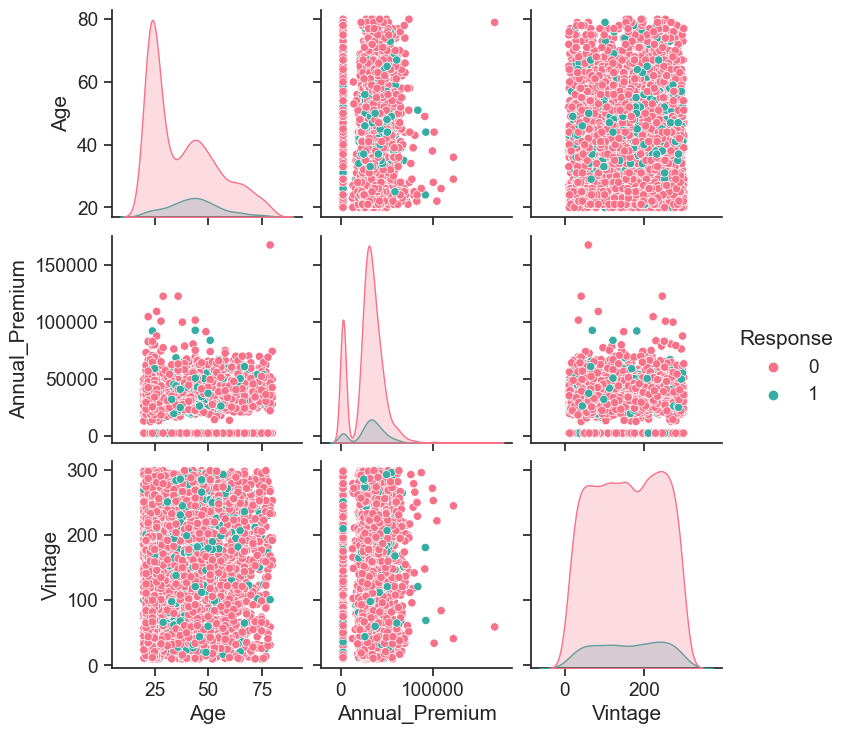

In [415]:
sns.pairplot(df[['Age', 'Annual_Premium', 'Vintage', 'Response']].sample(frac=0.01), hue="Response", palette="husl");

# Визуализация временных рядов

## Загрузка и преобразование набора данных.

Загрузим новый набор данных, из [соревнования](https://www.kaggle.com/justinas/housing-in-london) или из нашего репозитория.

In [68]:
df = pd.read_csv(DATA / 'housing_in_london/housing_in_london_monthly_variables.csv')

In [69]:
df.shape

(13549, 7)

In [75]:
type(df.date.loc[0])

str

In [76]:
# установим индексом дату для упрощения работы с данным набором данных
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

In [77]:
df.head(5)

area  average_price       code  houses_sold  \
date                                                                
1995-01-01  city of london          91449  E09000001         17.0   
1995-02-01  city of london          82203  E09000001          7.0   
1995-03-01  city of london          79121  E09000001         14.0   
1995-04-01  city of london          77101  E09000001          7.0   
1995-05-01  city of london          84409  E09000001         10.0   

            no_of_crimes  borough_flag  
date                                    
1995-01-01           NaN             1  
1995-02-01           NaN             1  
1995-03-01           NaN             1  
1995-04-01           NaN             1  
1995-05-01           NaN             1

Данные разделены по районам Лондона, называемым `borough` (для их обозначения существует флаг), но для некоторых переменных используются другие географические регионы Великобритании (например, Англия, Северо-Восток и т.д.).

In [78]:
# выберем только Лондон
prices_london = df[df['borough_flag'] == 1]

In [79]:
london_mean_price = prices_london.groupby('date')['average_price'].mean()

In [82]:
prices_london.shape

(9936, 6)

## Линейный график и update_layout

`update_layout` используется для редактирвоания разметки графика, а детали самого графика и данных задаются непосредственно в методе графика.

In [83]:
fig = px.line(prices_london, x=prices_london.index, y="average_price", color='area')

fig.update_layout(
    template='gridon',
    title='Average Monthly London House Price by Borough',
    xaxis_title='Year',
    yaxis_title='Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

fig.show()

Выводы
- всегда был самым дорогим район `kensington and chelsea`,
- в более дорогих районах средняя цена колеблется больше,
- в `brent` значительно уменьшилась средняя цена в 2019 (это лучше видно на следующей диаграмме).

Однако анализировать 35 линейных графиков сложно. Хорошо, что есть приближение в plotly.

## Изменение цены год к году с помощью Heatmap

In [84]:
# Calculate the mean yearly price per borough
yearly_prices_london = prices_london.groupby('area').resample('y')['average_price'].mean()

# Calculate the yealy average price percentage change
yearly_prices_london_pct_ch = yearly_prices_london.groupby(level='area').apply(lambda x: x.pct_change())

yearly_prices_london_pct_ch = yearly_prices_london_pct_ch.unstack()
yearly_prices_london_pct_ch = yearly_prices_london_pct_ch.iloc[::-1]

del yearly_prices_london_pct_ch['1995-12-31']

In [85]:
fig = go.Figure(data=go.Heatmap(
        z=yearly_prices_london_pct_ch.values,
        x=yearly_prices_london_pct_ch.columns,
        y=yearly_prices_london_pct_ch.index,
        colorscale='Cividis'))

fig.update_layout(
    title='YoY Average London House Price Percentage Change',
    title_x=0.5,
    yaxis_nticks=33,
    xaxis_title='Year',
    yaxis_title='Borough'
)

fig.show()

В 2000 году произошел самый резкий рост цен на жилье, в середине 2010 года цены также имели тенденцию к росту, но с тех пор они были относительно стабильными / снижались (за исключением 2014го года).

## Визуализация с более крупными временными интервалами

`resample('y')` означает, что мы сводим временной ряд к годовому интервалу

In [86]:
london_mean_values = prices_london.groupby('area').resample('y').mean().reset_index().set_index('date')

In [87]:
london_mean_values.head()

area  average_price  houses_sold  no_of_crimes  \
date                                                                         
1995-12-31  barking and dagenham   51818.000000   123.000000           NaN   
1996-12-31  barking and dagenham   51718.250000   156.750000           NaN   
1997-12-31  barking and dagenham   55974.250000   202.833333           NaN   
1998-12-31  barking and dagenham   60285.750000   208.000000           NaN   
1999-12-31  barking and dagenham   65320.833333   223.833333           NaN   

            borough_flag  
date                      
1995-12-31           1.0  
1996-12-31           1.0  
1997-12-31           1.0  
1998-12-31           1.0  
1999-12-31           1.0

In [88]:
fig = px.line(london_mean_values, x=london_mean_values.index, y="average_price", color='area')

fig.update_layout(
    template='gridon',
    title='Average Monthly London House Price by Borough',
    xaxis_title='Year',
    yaxis_title='Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

fig.show()

## Диаграмма рассеянья строится аналогично обычным табличным данным

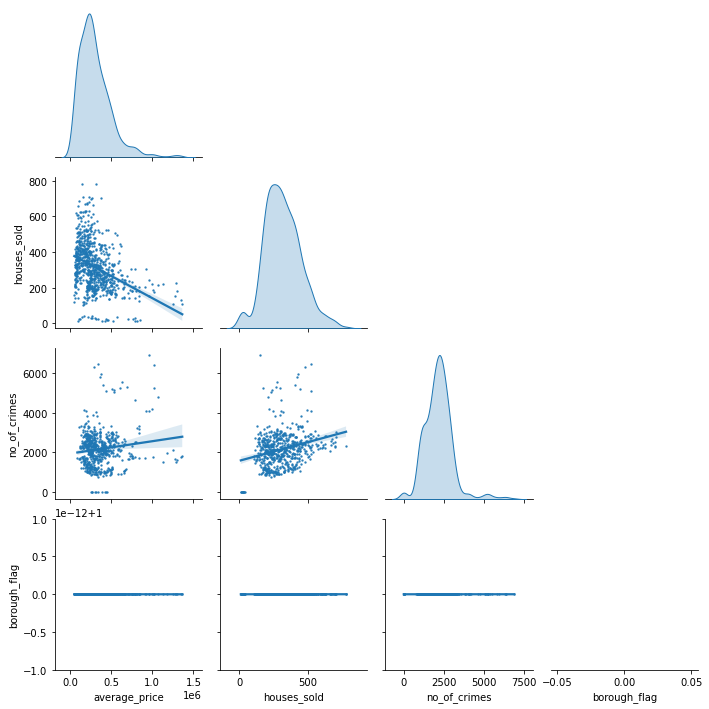

In [93]:
sns.pairplot(london_mean_values.reset_index(), corner=True, kind='reg', diag_kind='kde', plot_kws=dict(scatter_kws=dict(s=2)))
plt.show()